# Analyzing the Ontario Labour Force Estimates

dataset info:

Title: Labour force estimates by occupation

Dataset Source: Ontario Data Catalogue

Dataset URL: https://data.ontario.ca/dataset/labour-force-estimates-by-occupation

Date Accessed: October 17, 2023


In [9]:
# Importing py libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [10]:
# Loading dataset into a py dataframe

df = pd.read_csv('mltsd_v0906_18_tab4qq.csv')

In [11]:
# Exploratory Data Analysis
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

     MONTH               GEOGRAPHY     LFS CHARCT.              Occupation  \
0  Mar2001  Total, Ontario regions    Labour force  Total, all occupations   
1  Mar2001  Total, Ontario regions    Labour force  Total, all occupations   
2  Mar2001  Total, Ontario regions    Labour force  Total, all occupations   
3  Mar2001  Total, Ontario regions    Labour force  Total, all occupations   
4  Mar2001  Total, Ontario regions    Labour force  Total, all occupations   

                  AGE GROUP Both sexes    Male  Female  
0  Total, 15 years and over     6189.5  3303.2  2886.3  
1               15-64 years     6101.8  3244.9  2856.9  
2                     15-19      404.6   200.4   204.2  
3                     20-24      552.5   286.7   265.8  
4                     25-44     3221.4  1713.8  1507.6  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657280 entries, 0 to 657279
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   --

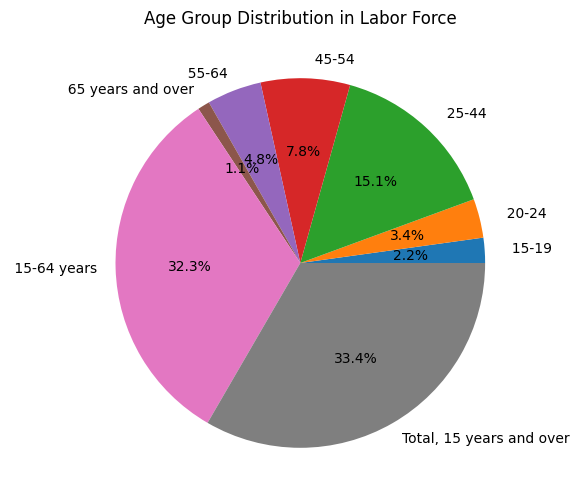

In [12]:
# Visualizing the Age Group Distribution

# Replacing non-numeric strings with NaN
df['Both sexes'] = pd.to_numeric(df['Both sexes'], errors='coerce')
df['Male'] = pd.to_numeric(df['Male'], errors='coerce')
df['Female'] = pd.to_numeric(df['Female'], errors='coerce')

# Converting data types to float for proper visualization
df['Both sexes'] = df['Both sexes'].astype(float)
df['Male'] = df['Male'].astype(float)
df['Female'] = df['Female'].astype(float)

# Age Group Distribution
age_group_totals = df.groupby('AGE GROUP')['Both sexes'].sum()
plt.figure(figsize=(10, 6))
plt.pie(age_group_totals, labels=age_group_totals.index, autopct='%1.1f%%')
plt.title('Age Group Distribution in Labor Force')
plt.show()


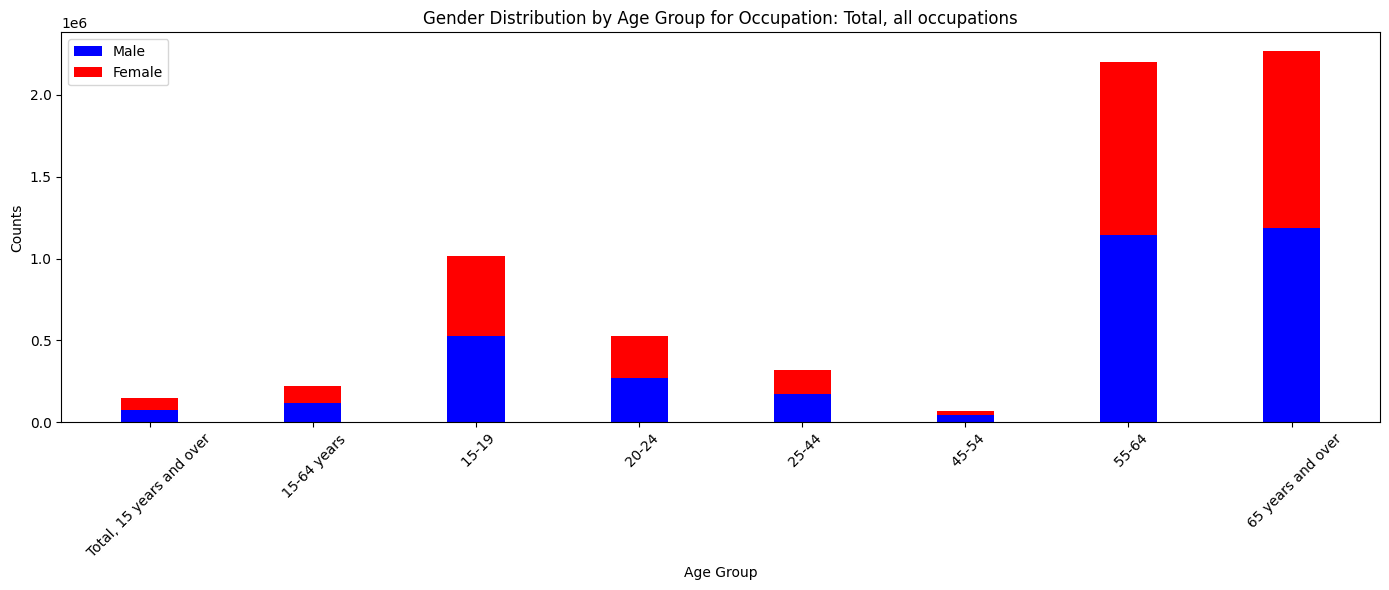

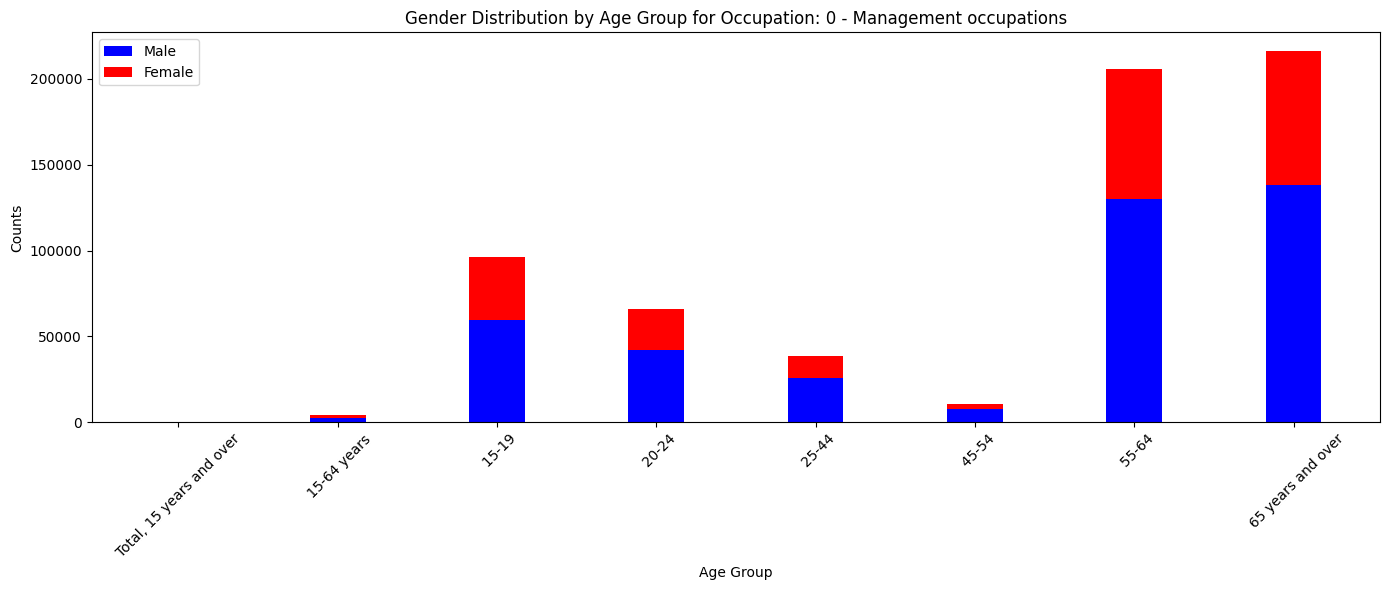

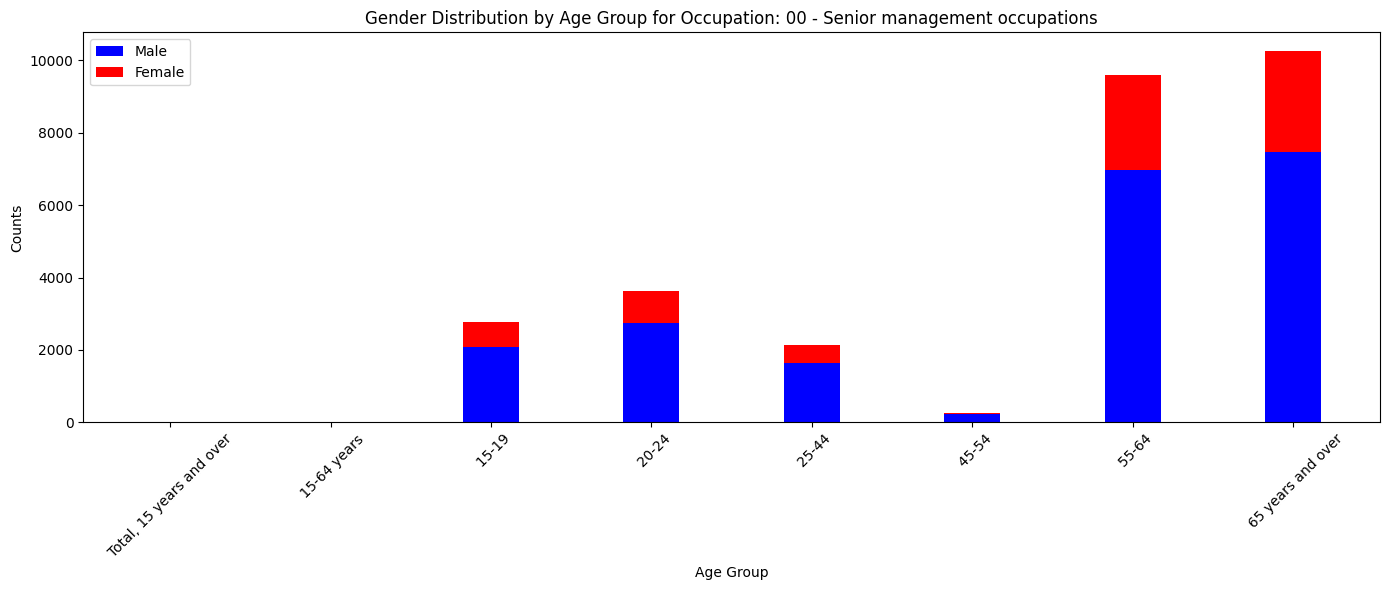

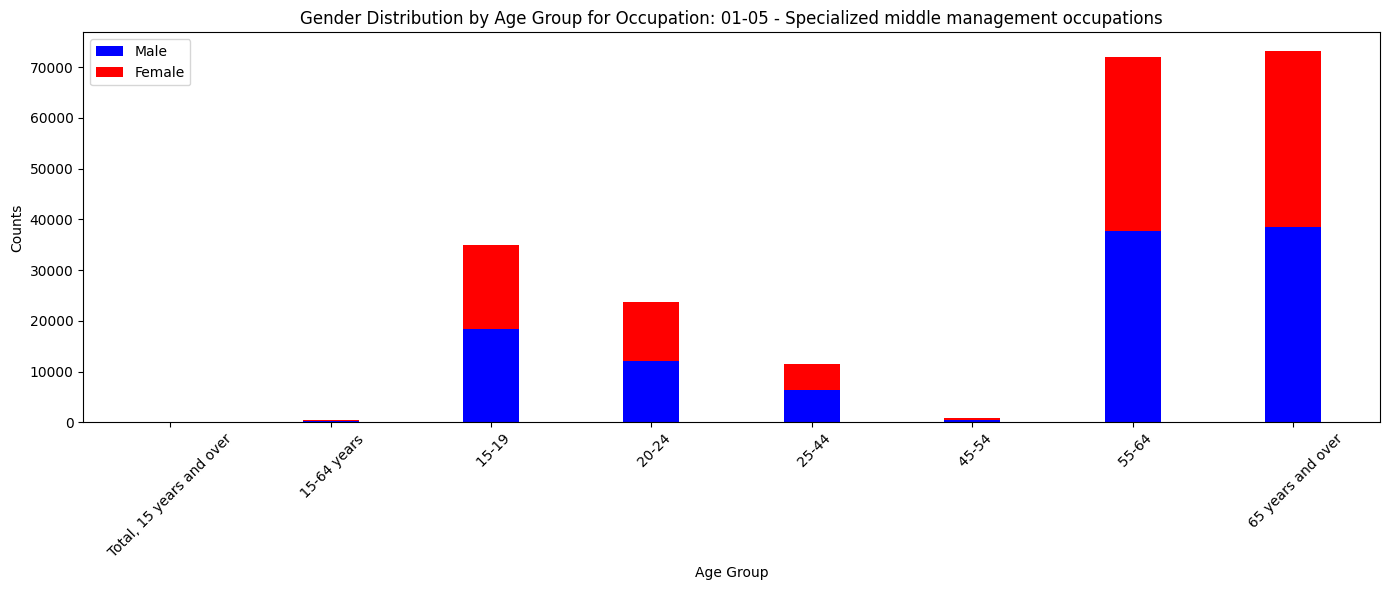

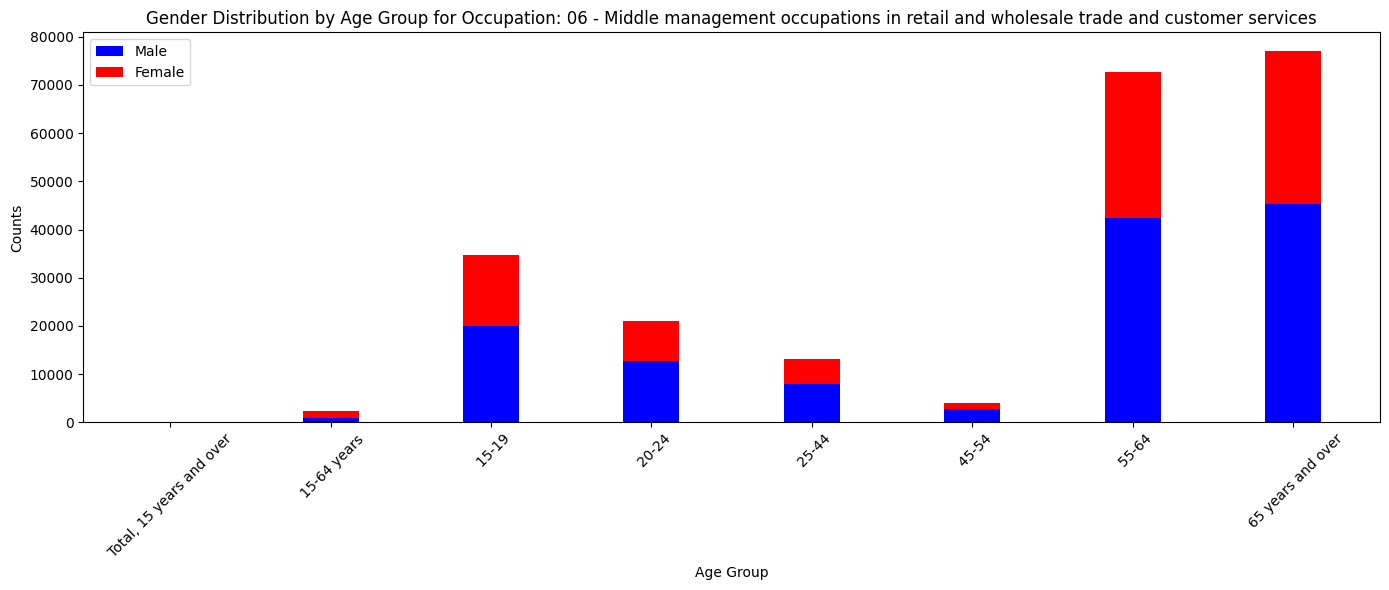

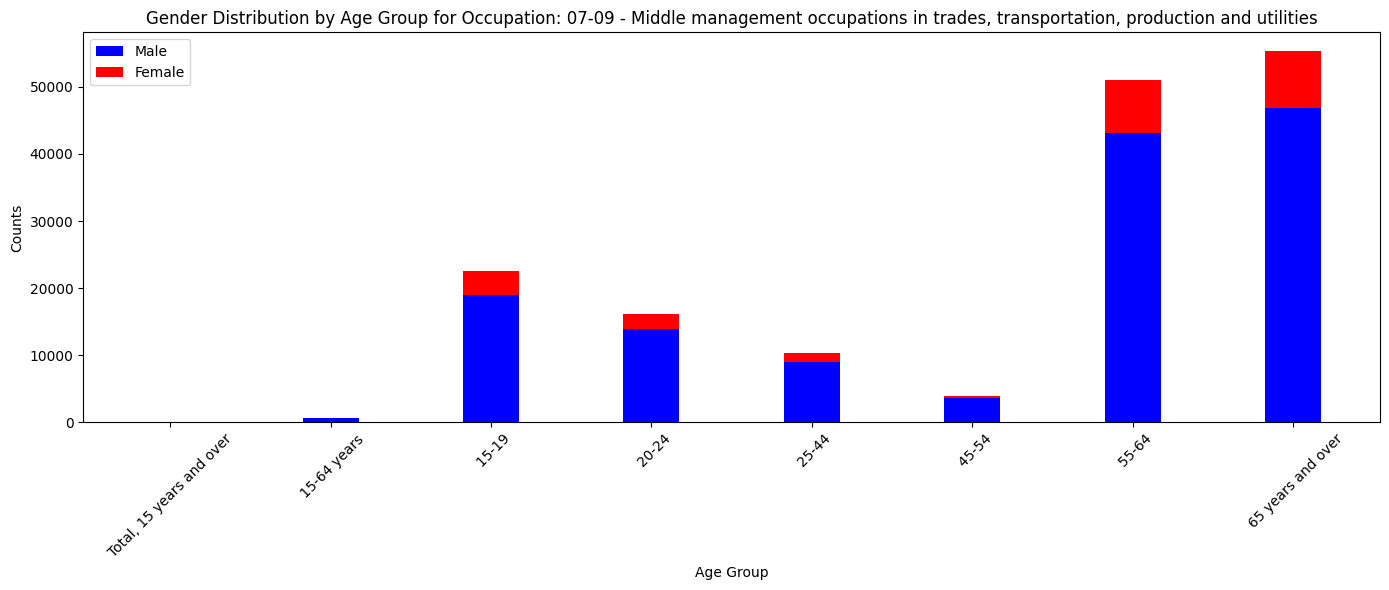

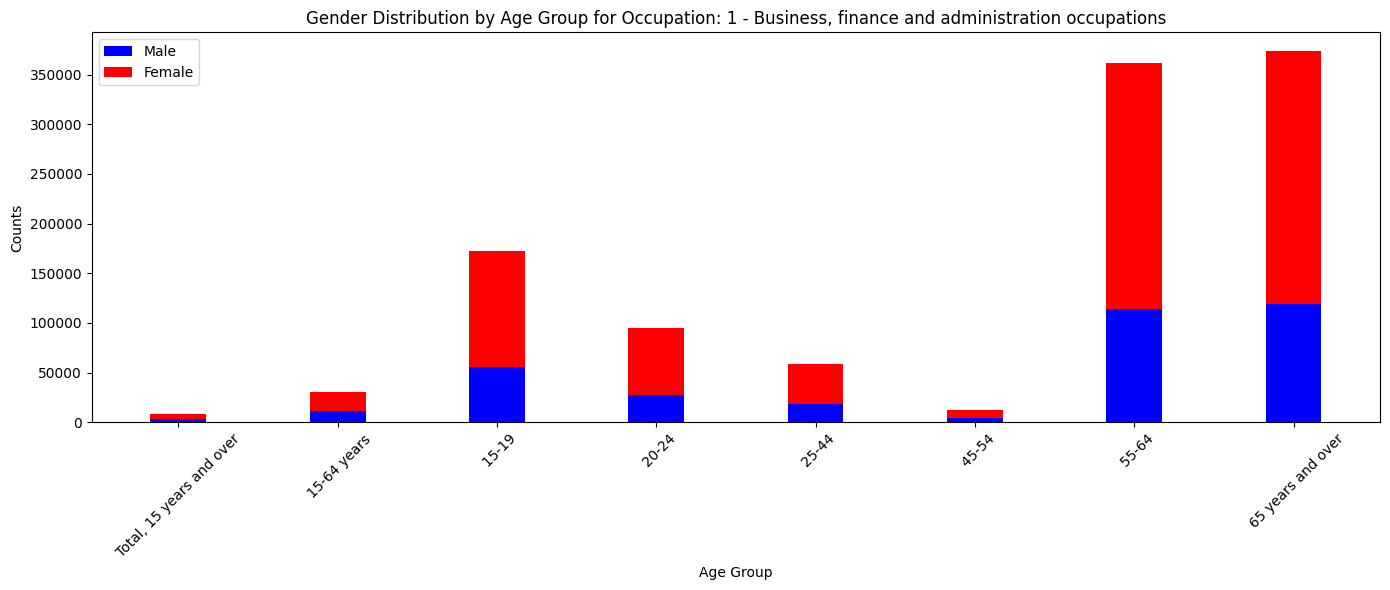

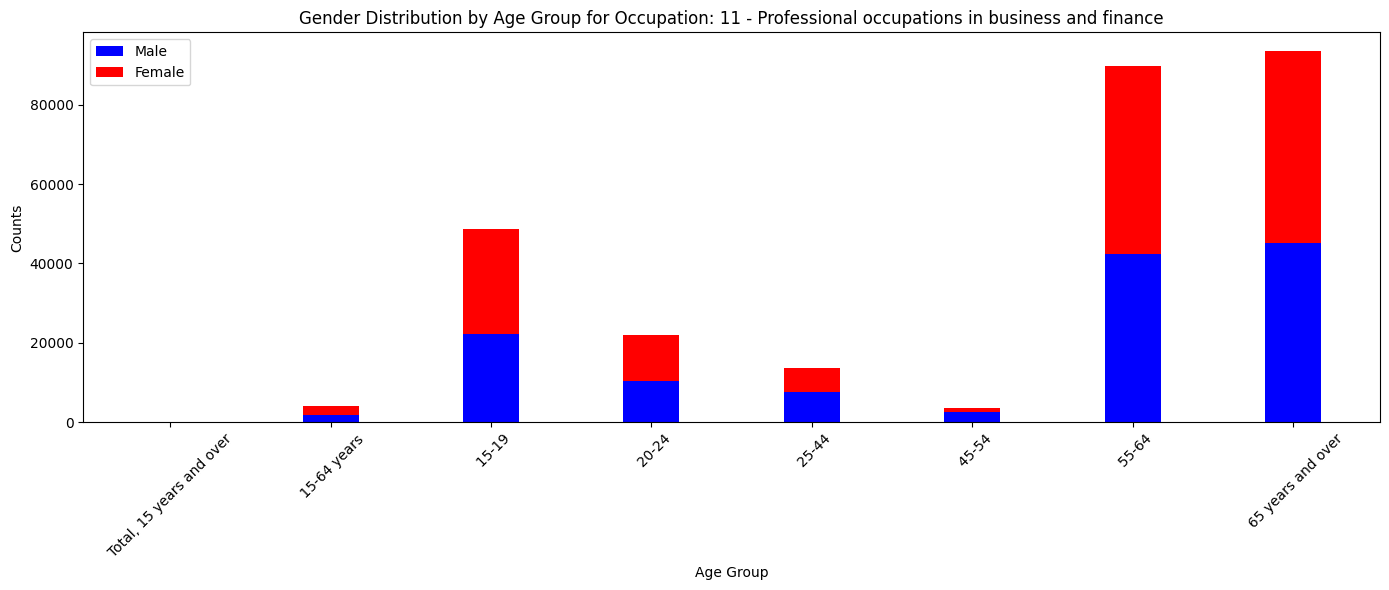

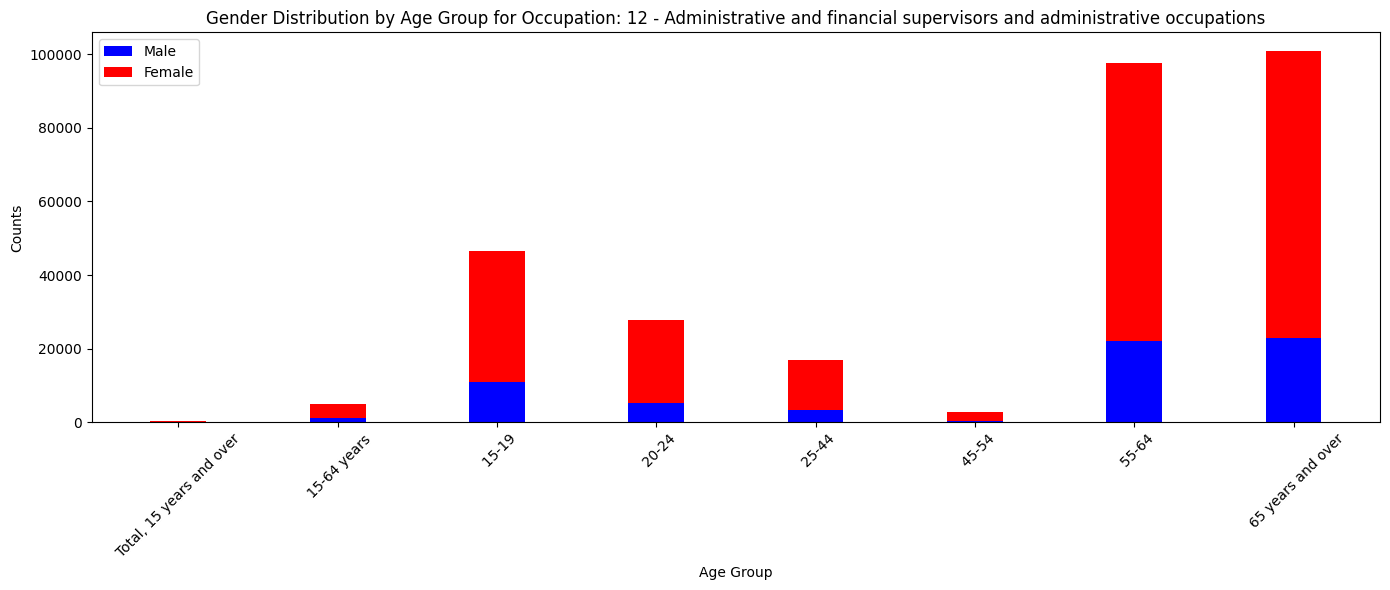

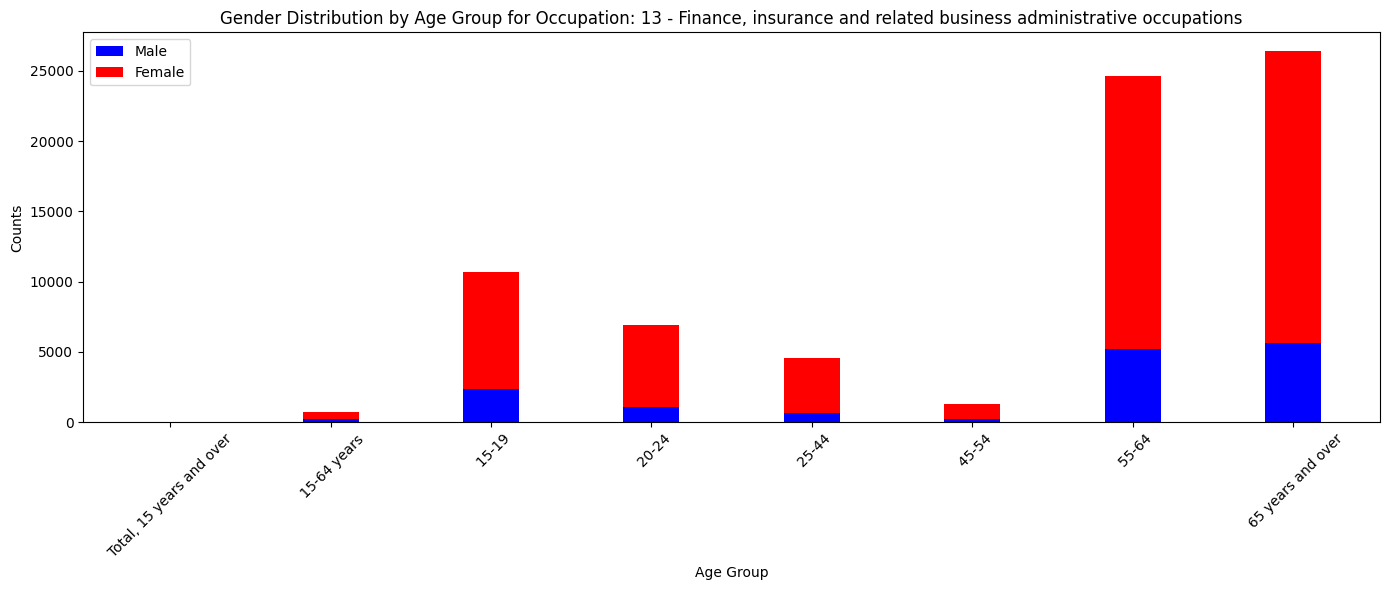

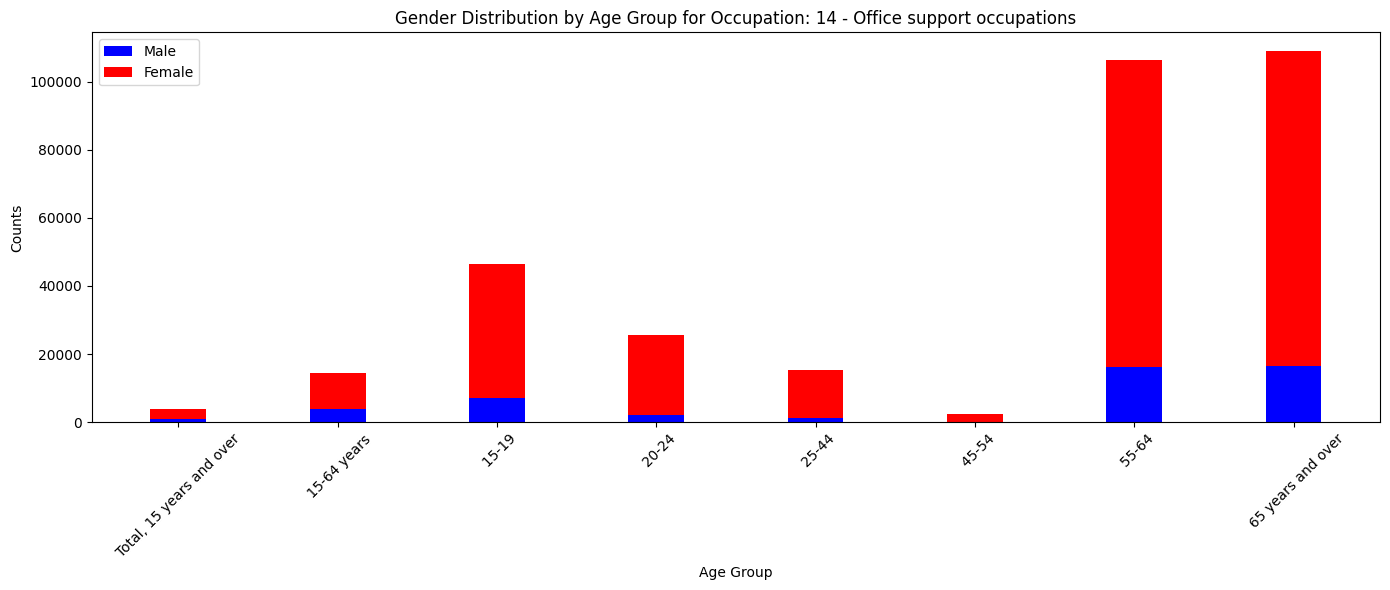

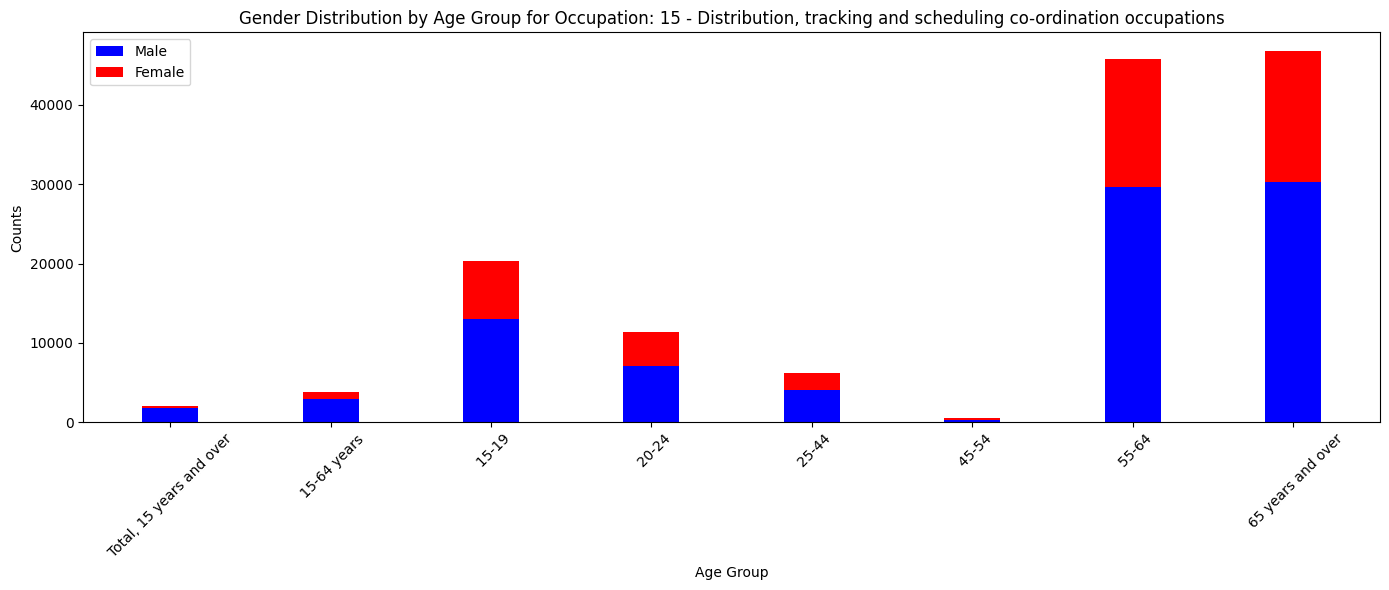

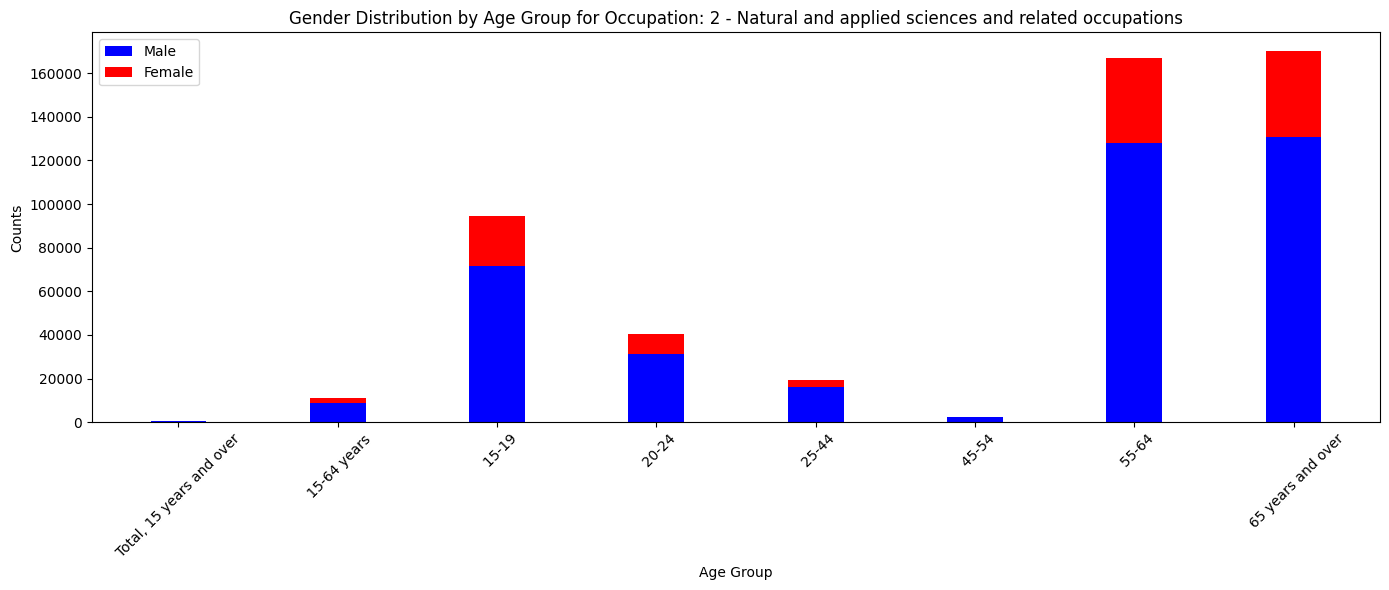

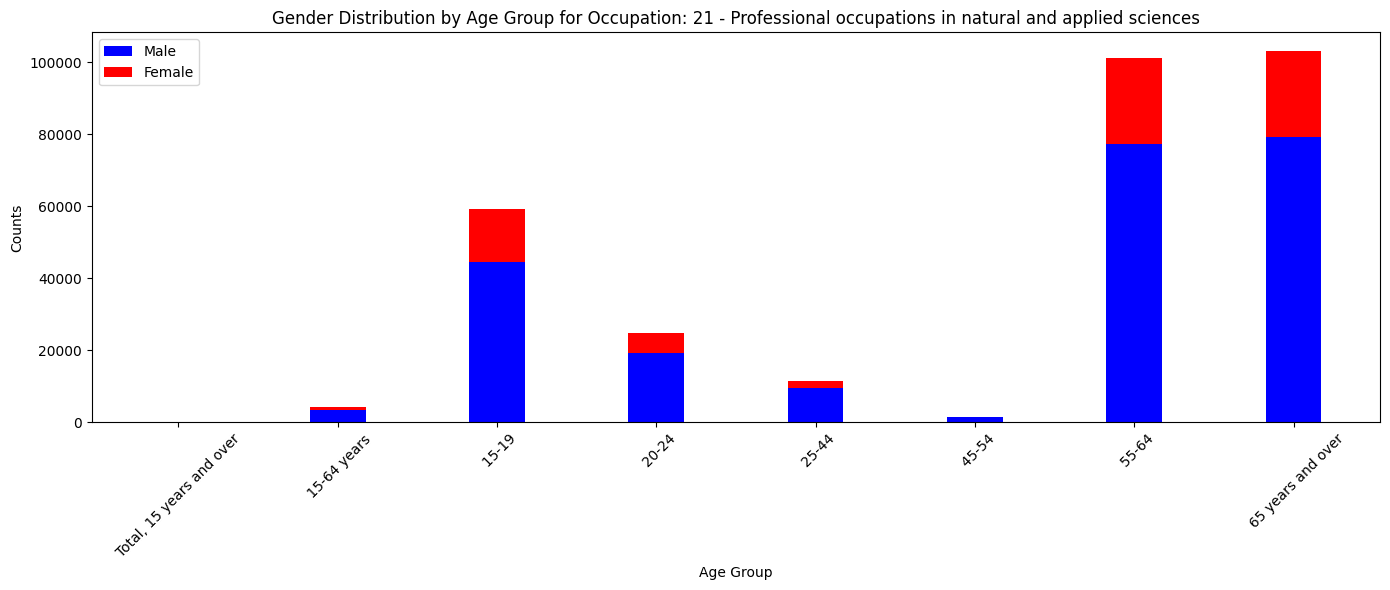

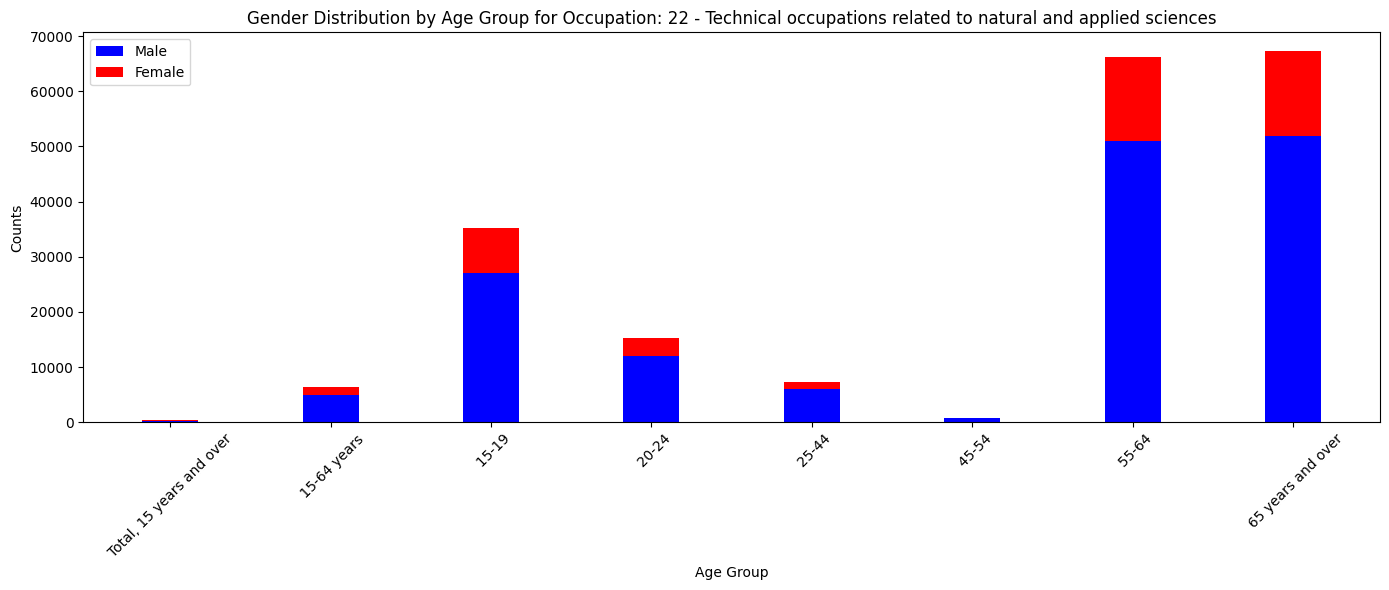

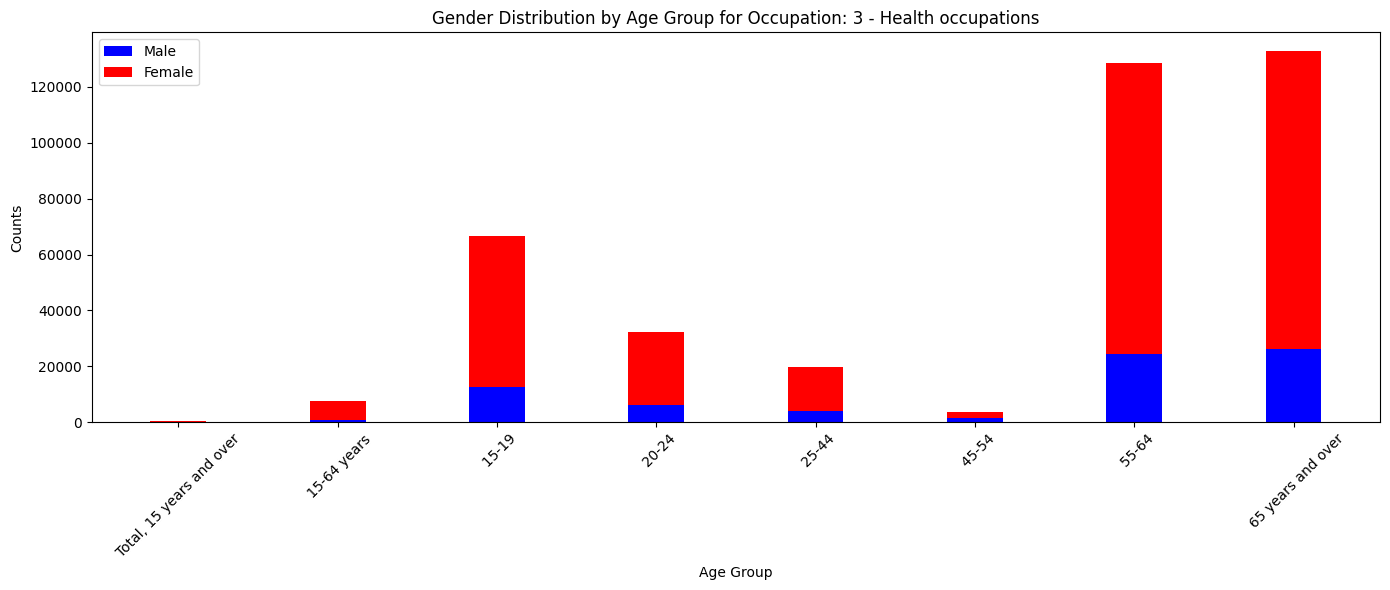

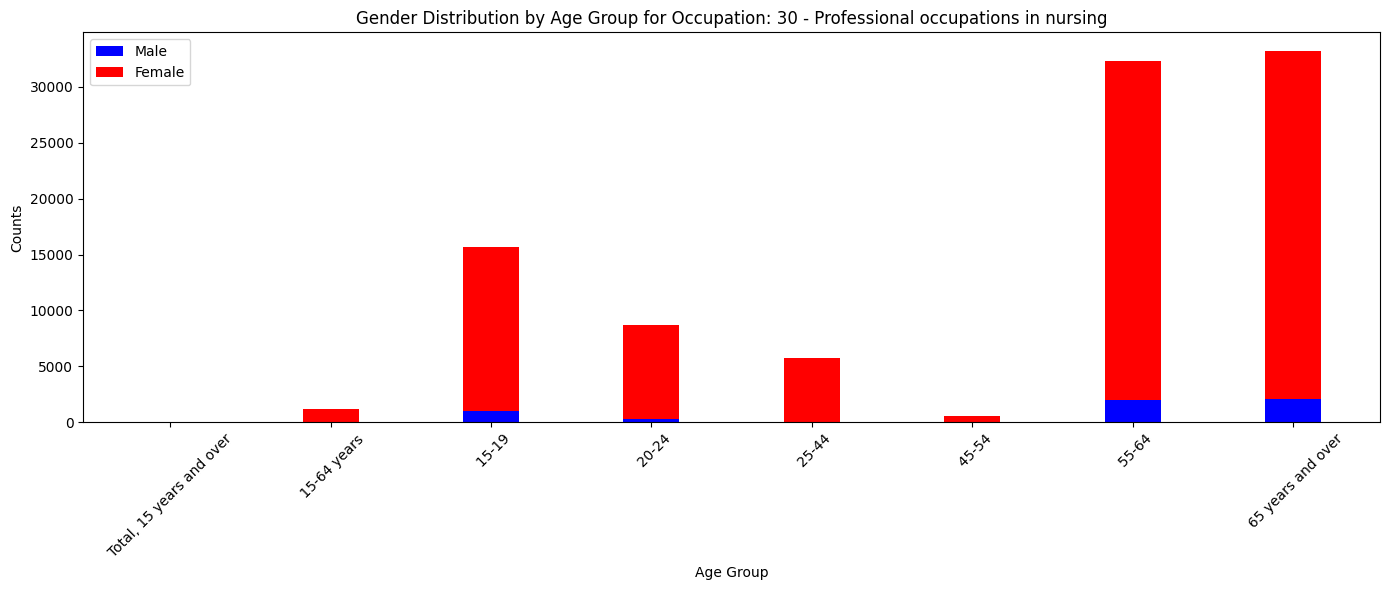

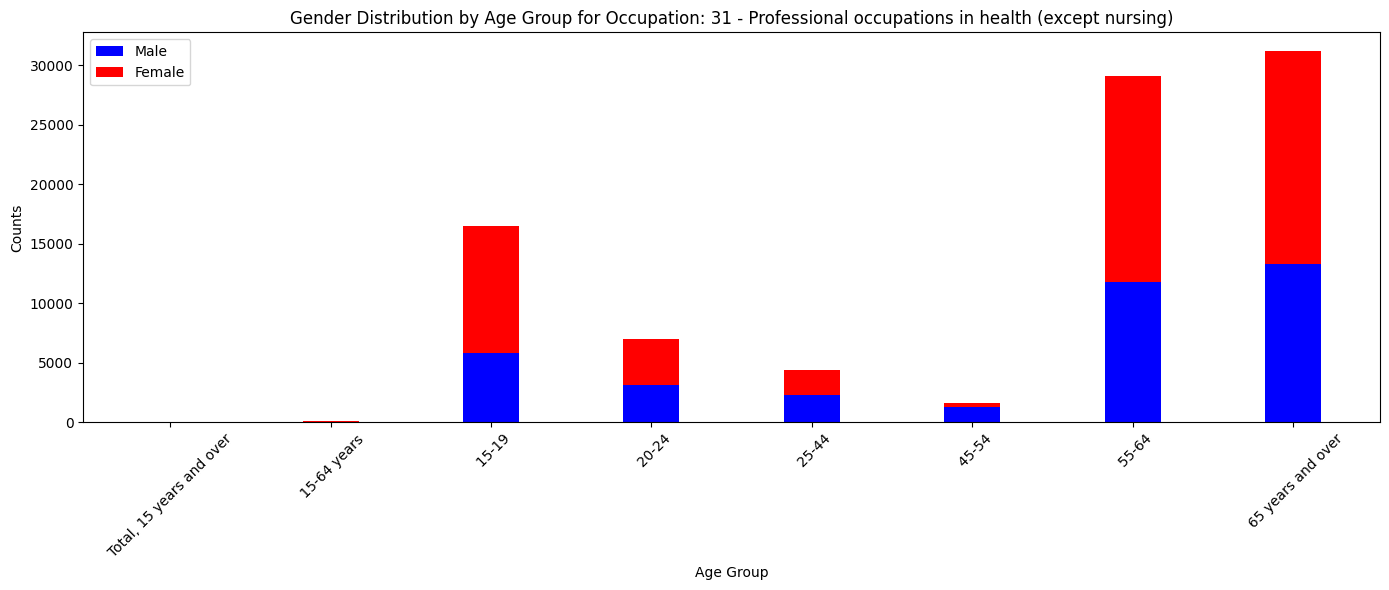

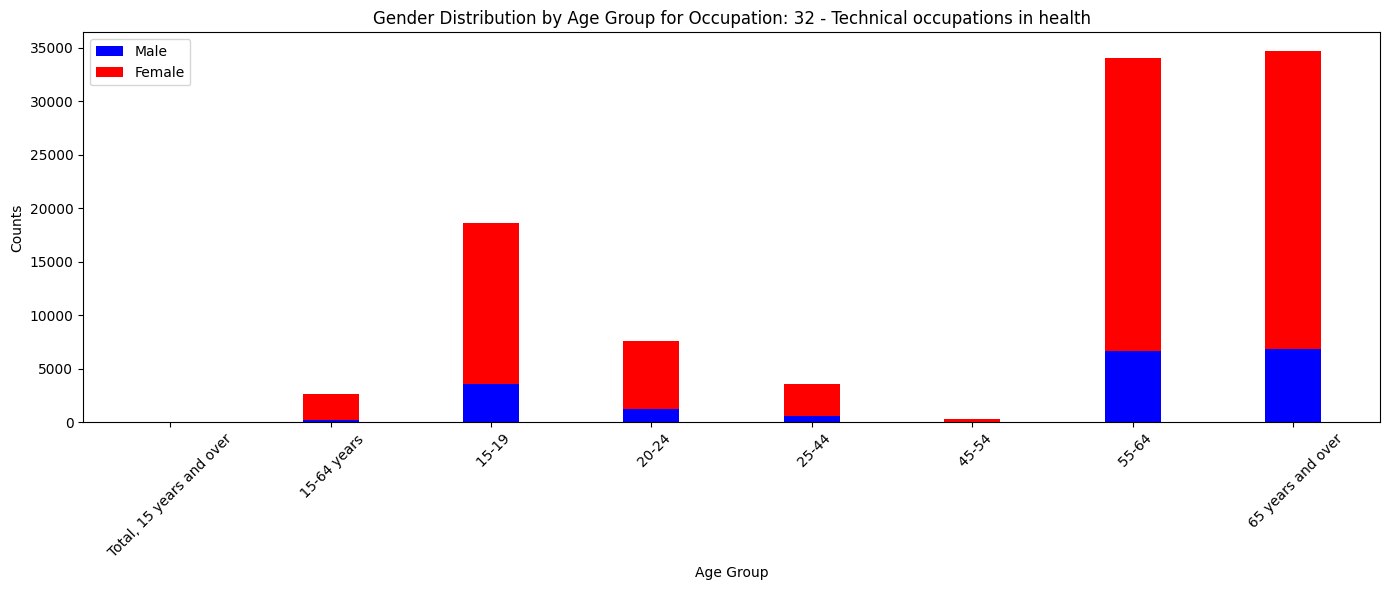

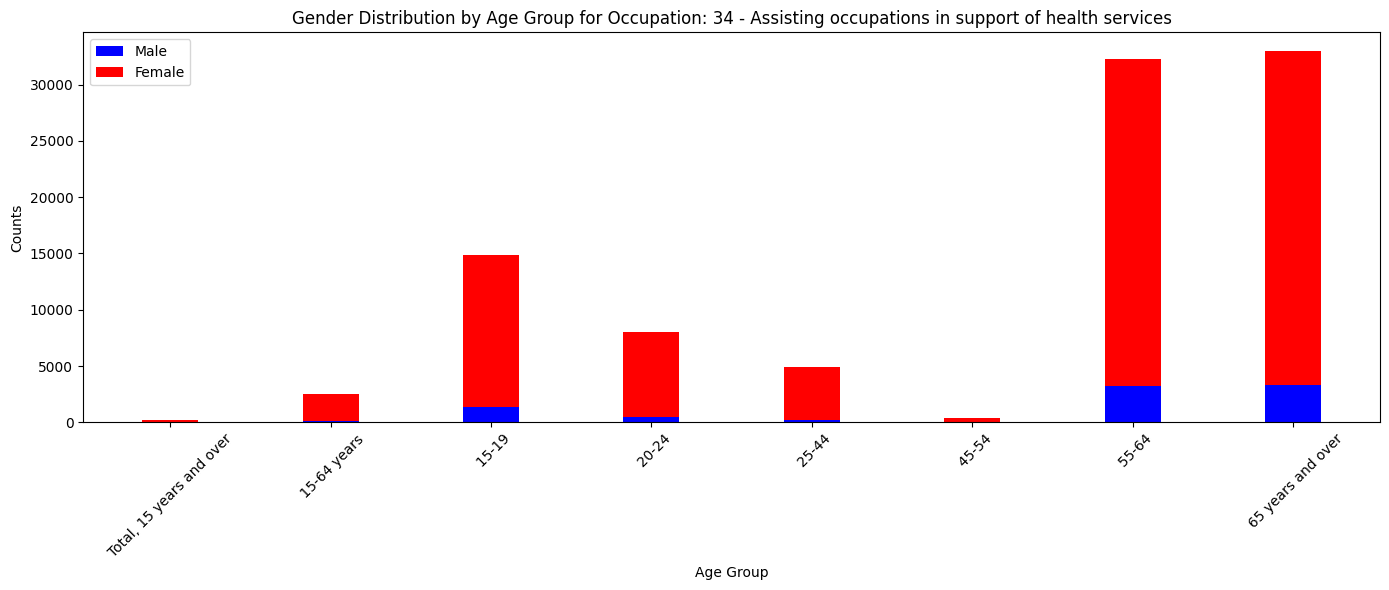

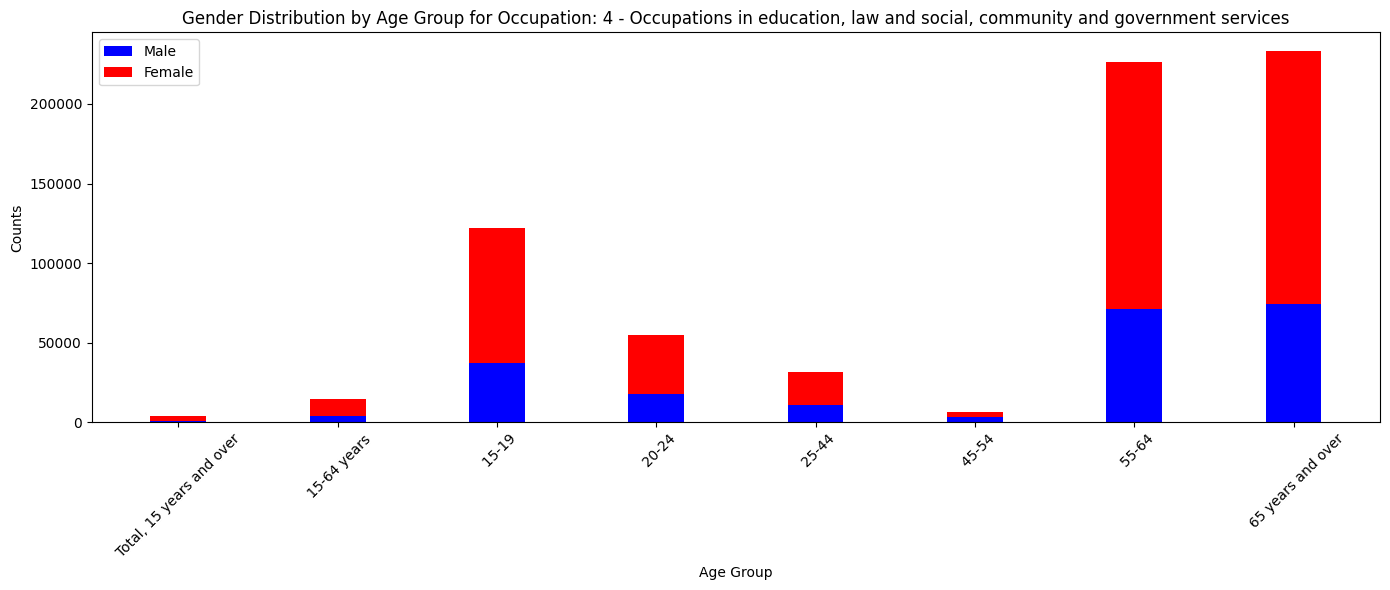

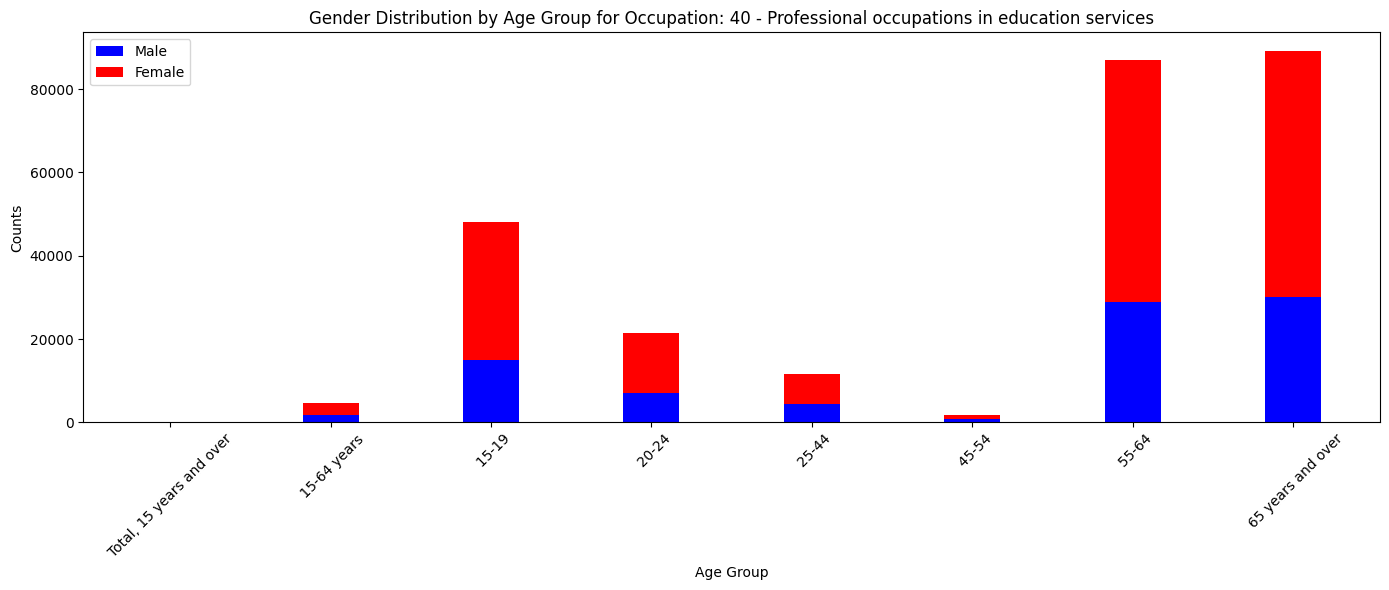

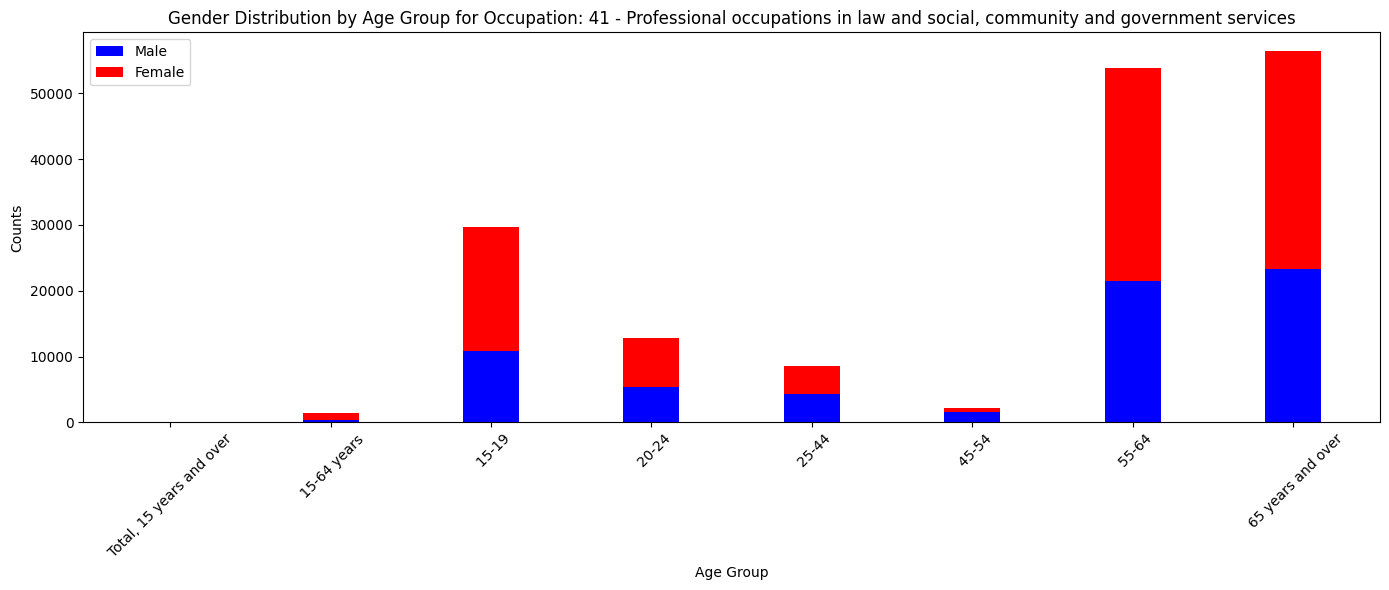

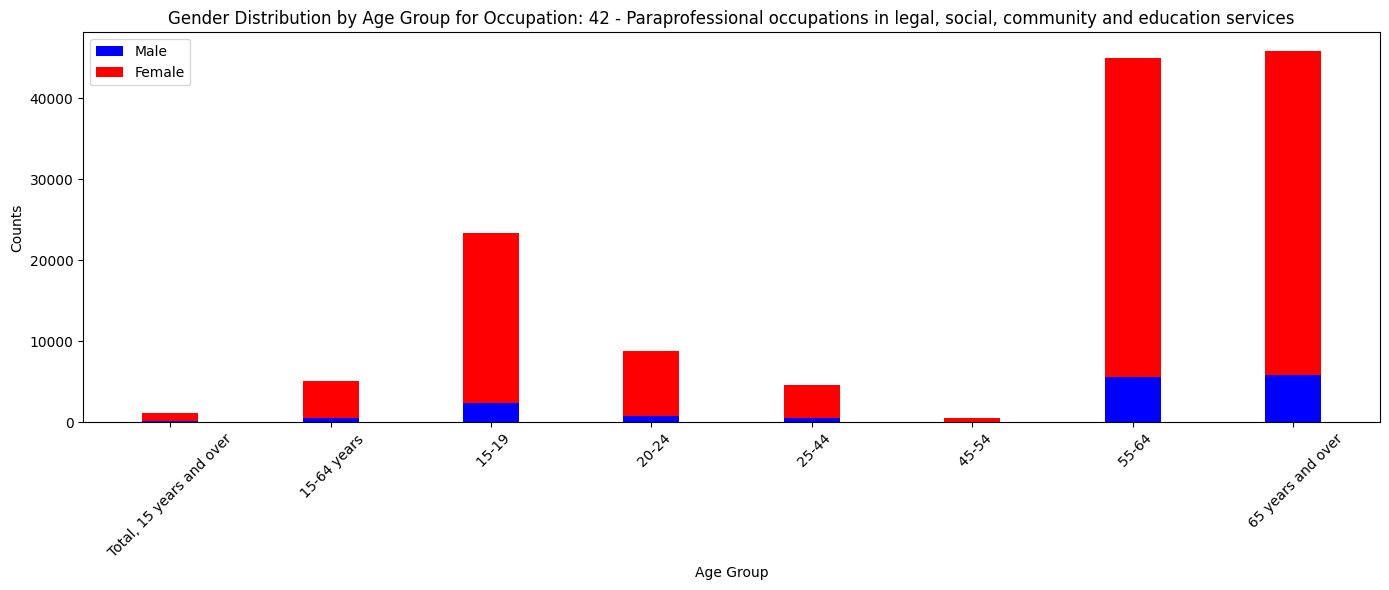

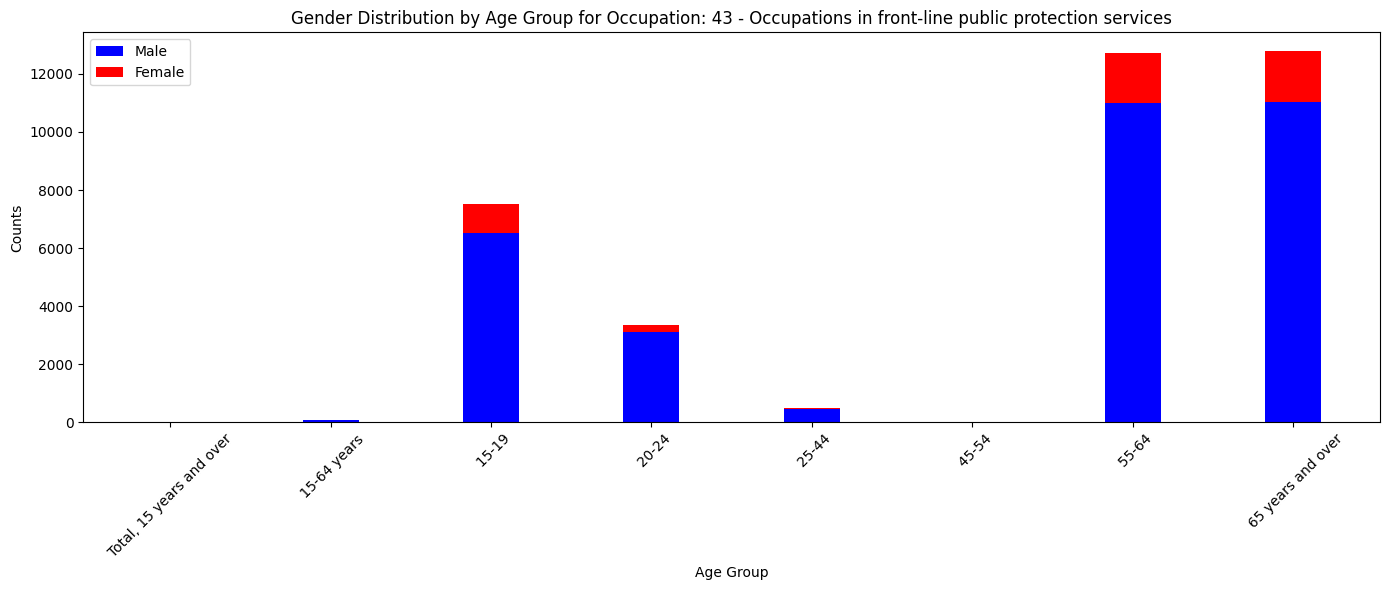

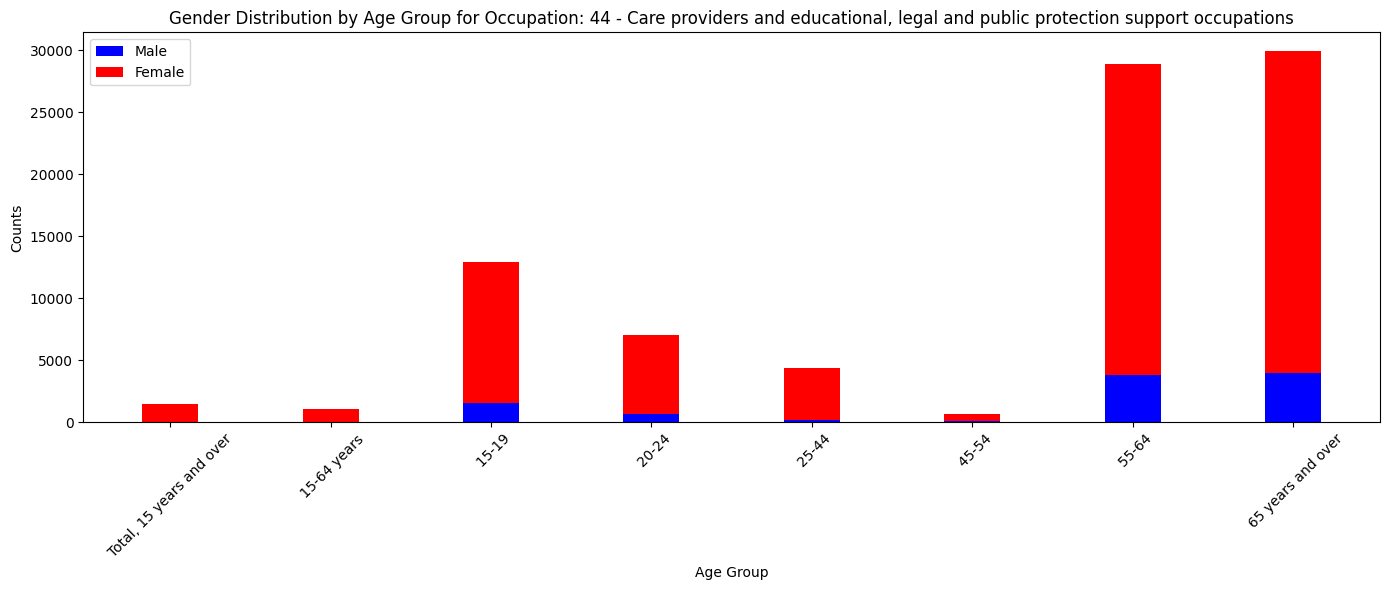

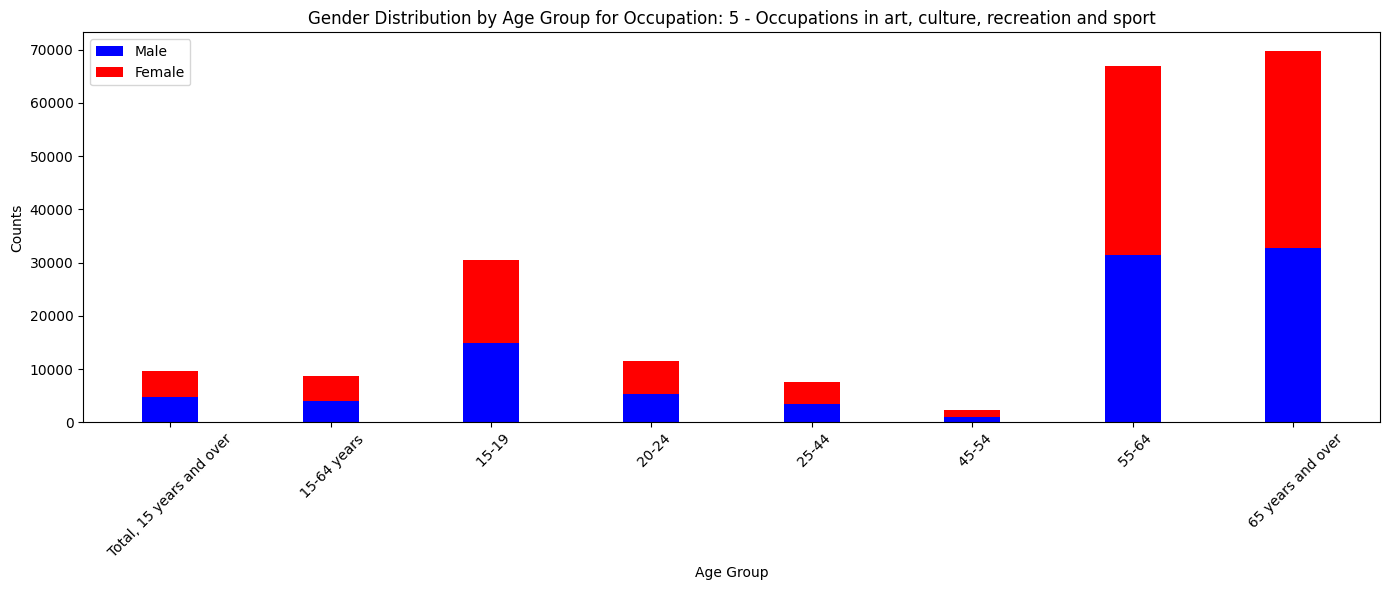

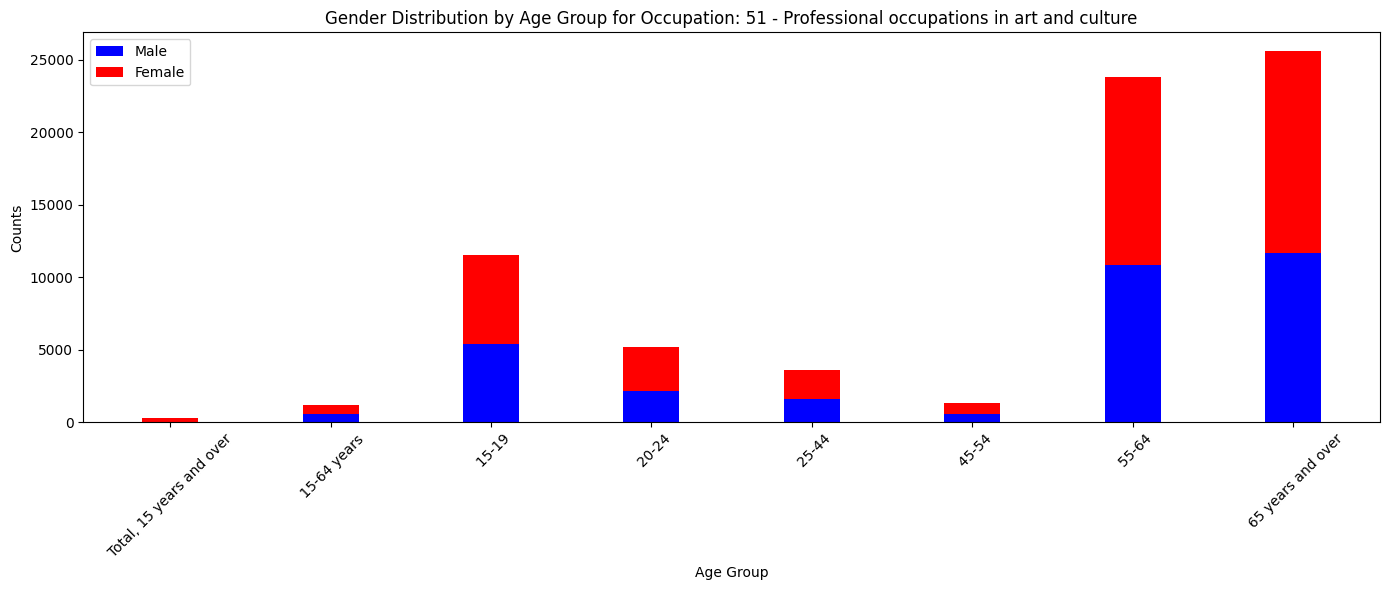

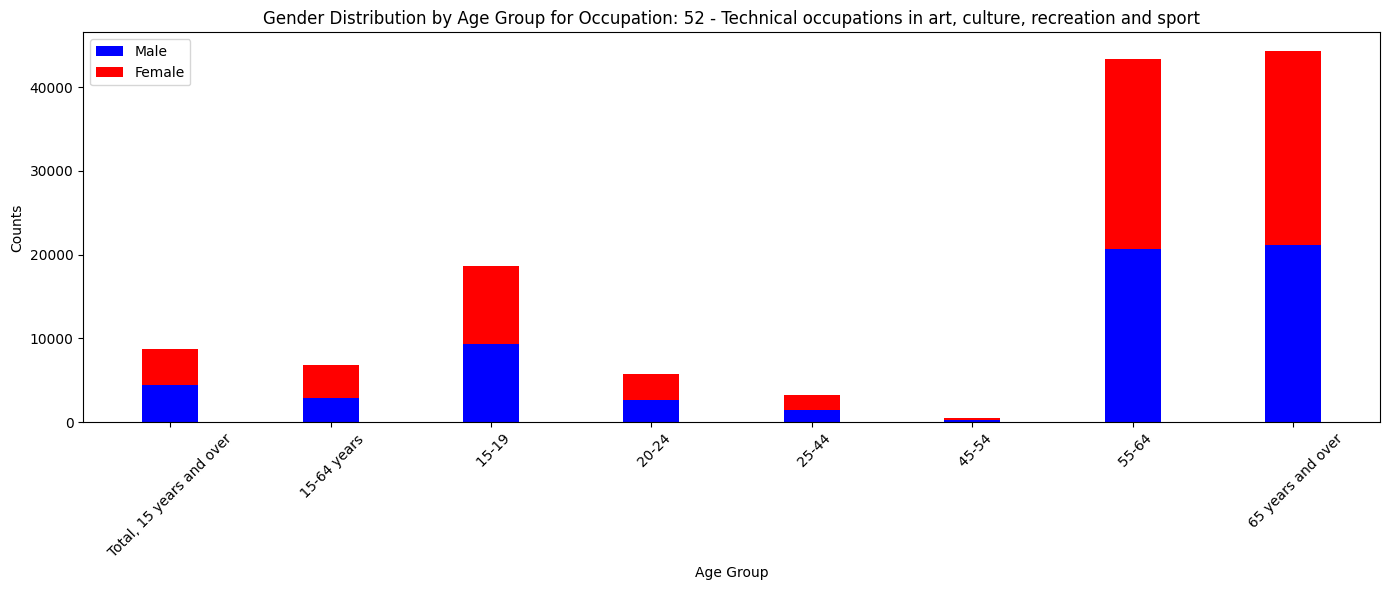

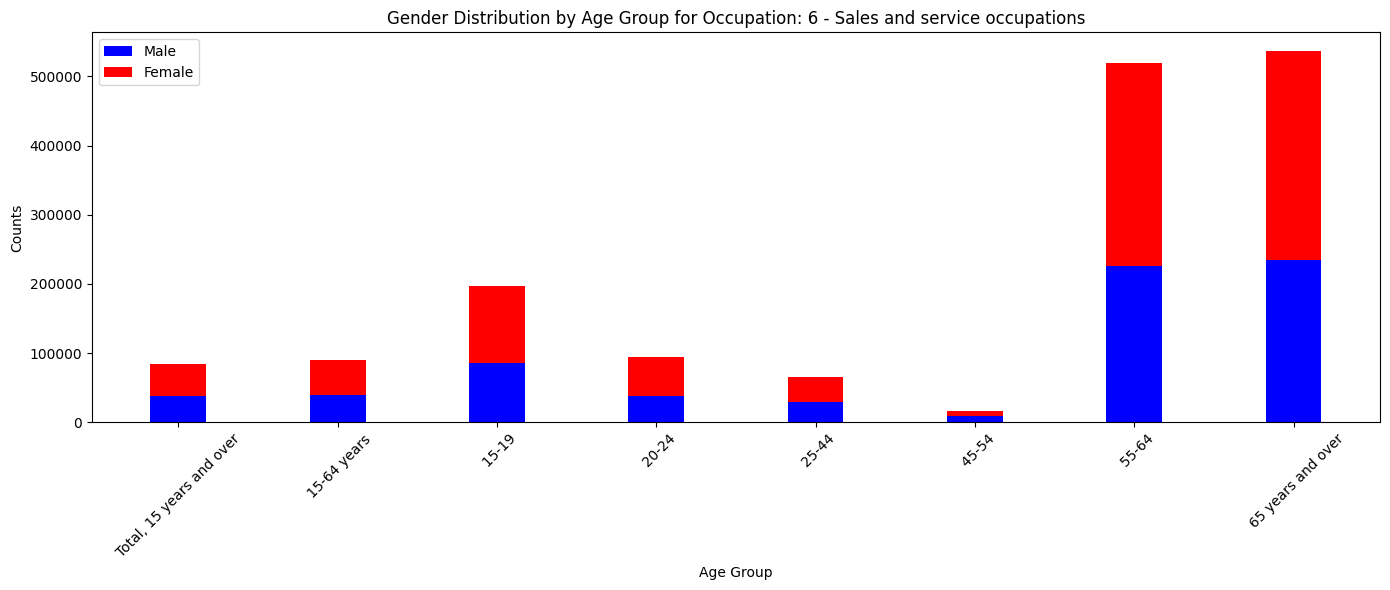

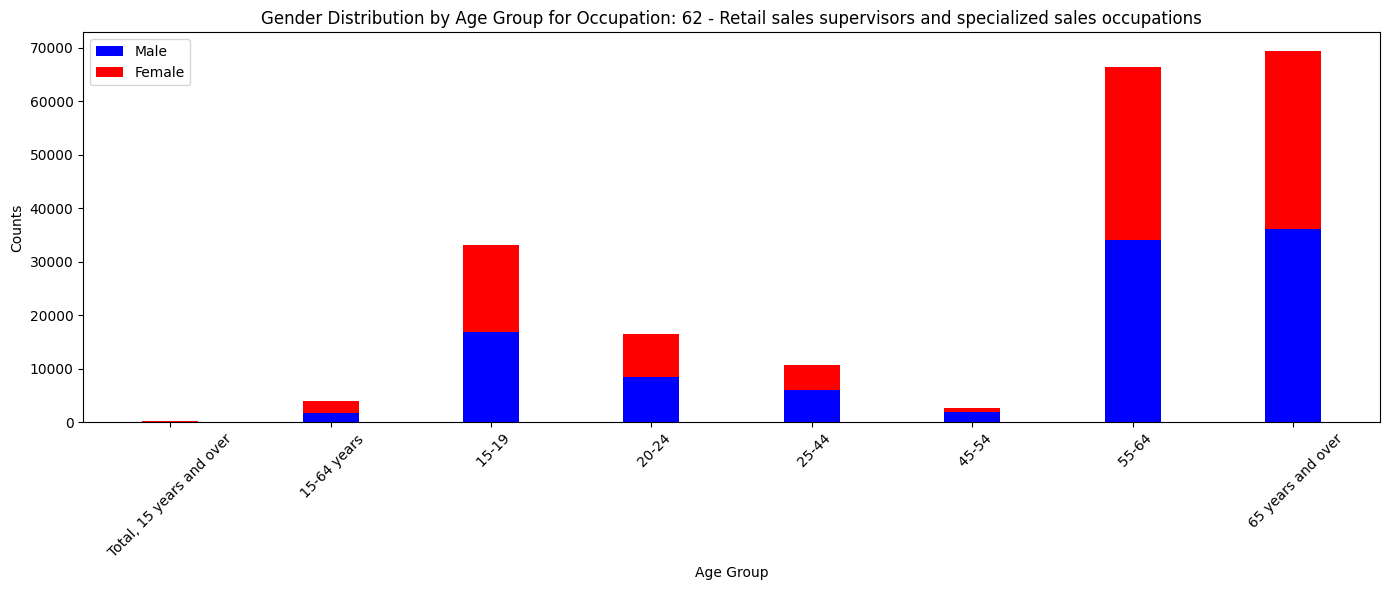

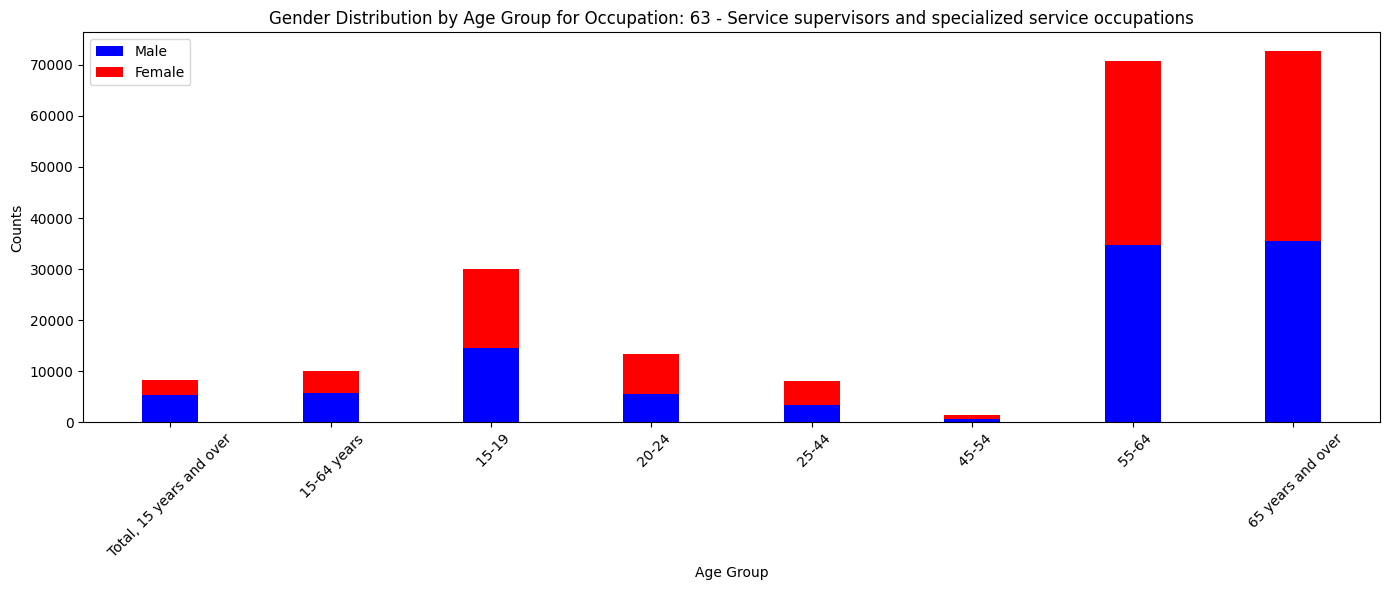

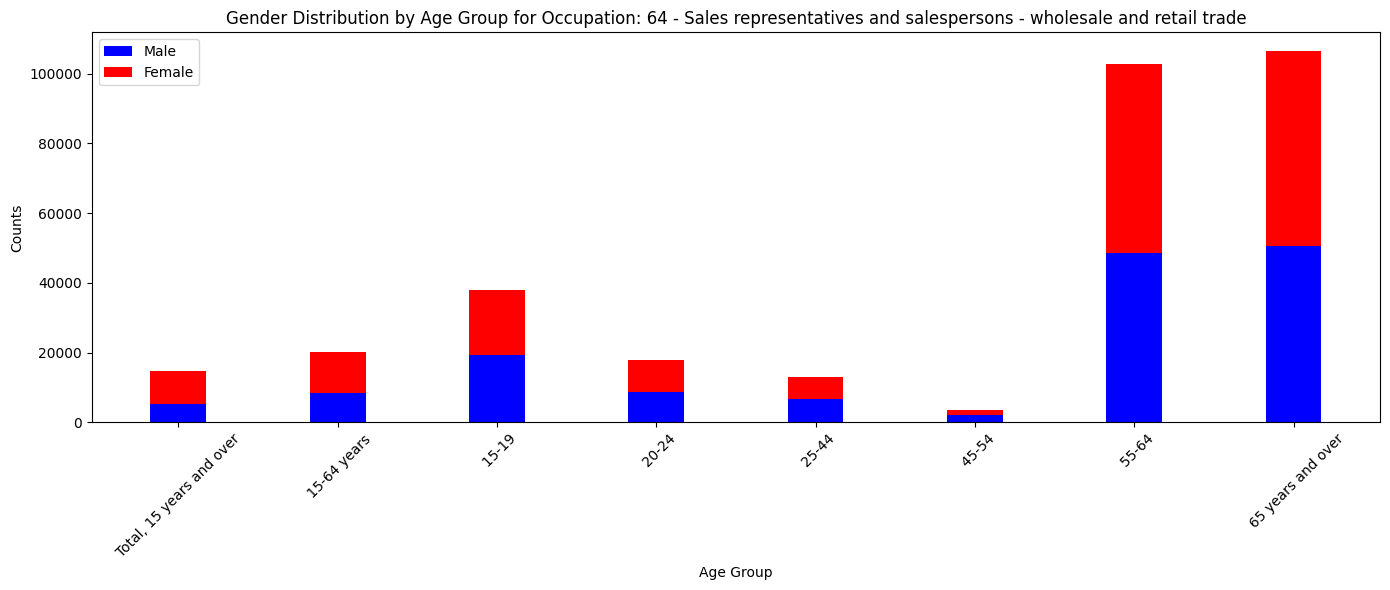

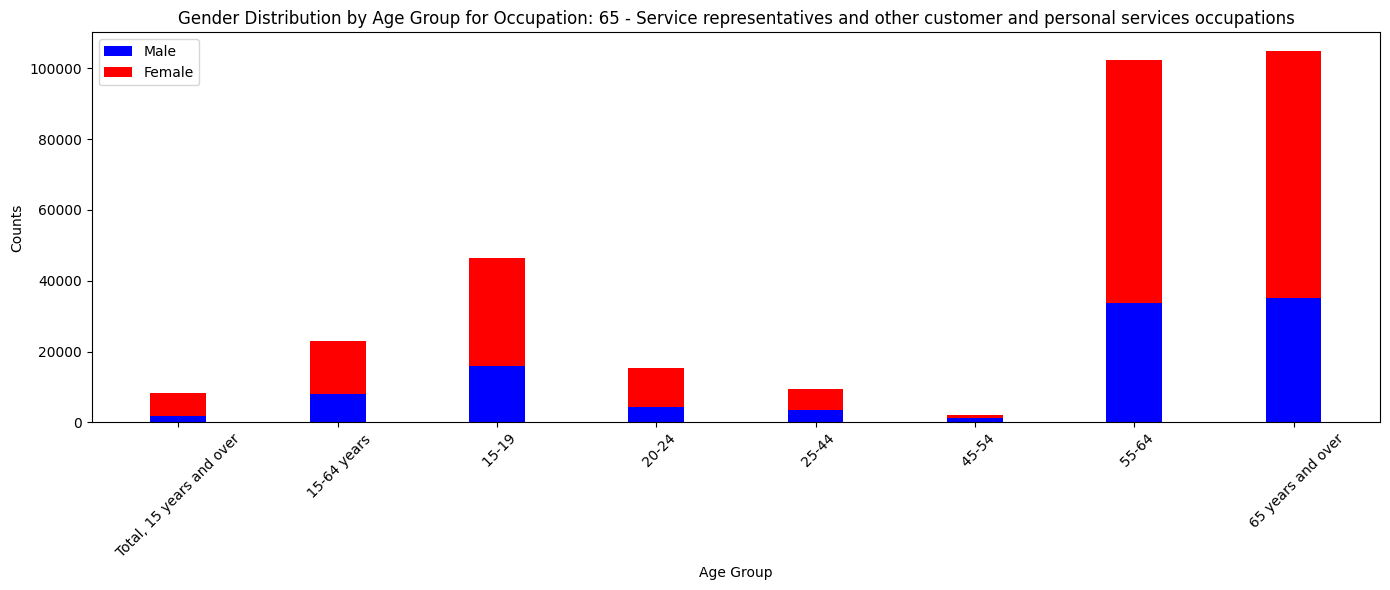

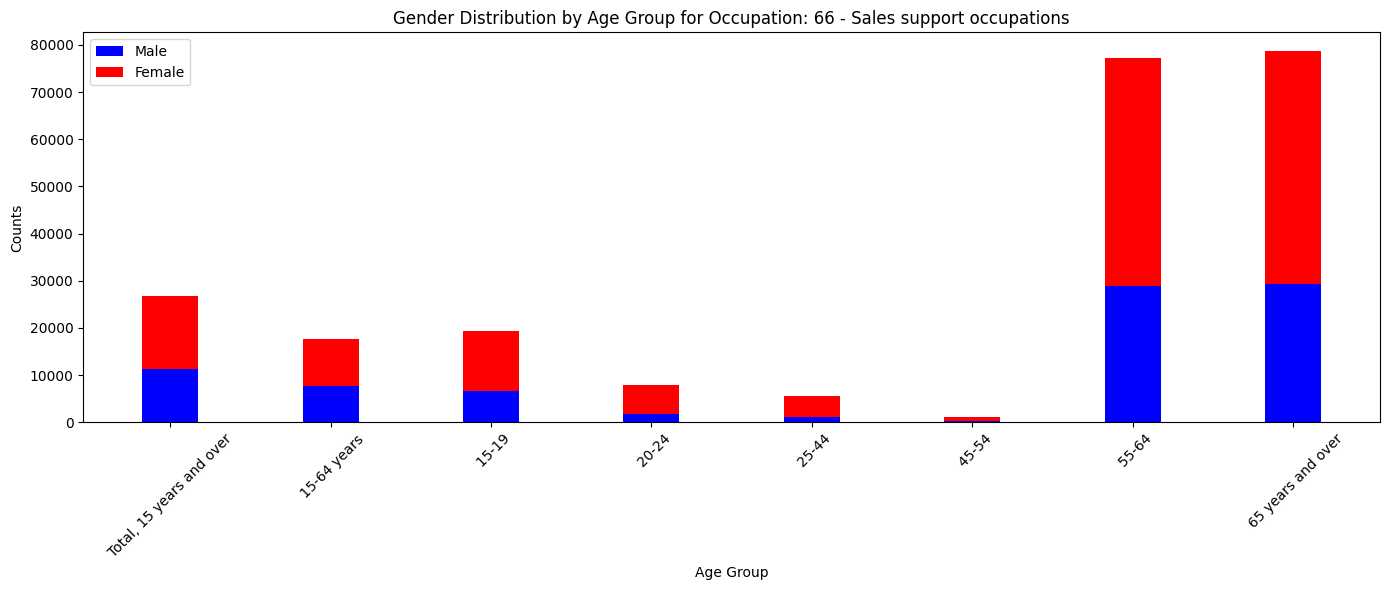

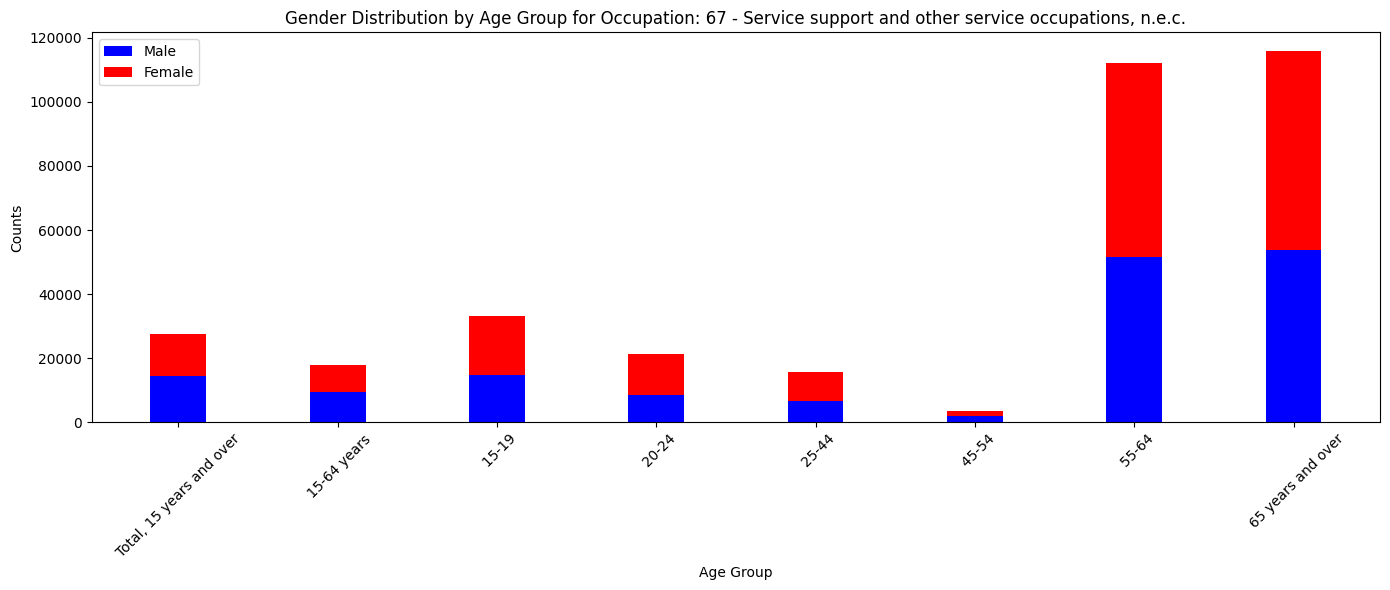

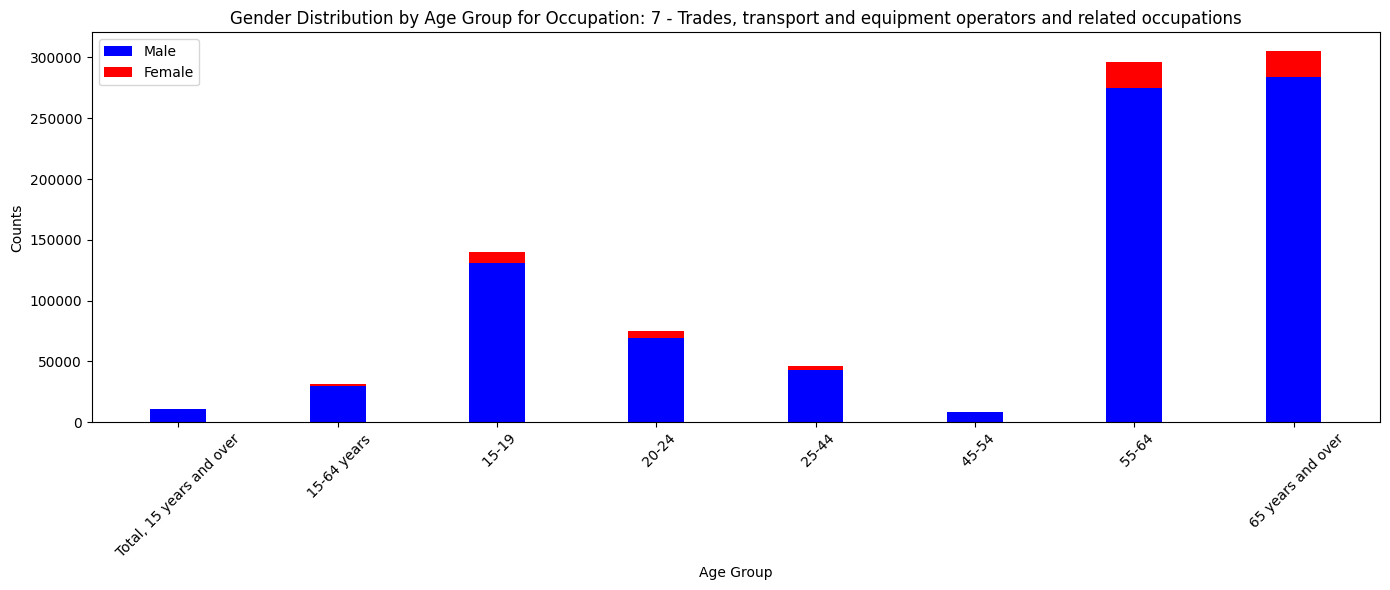

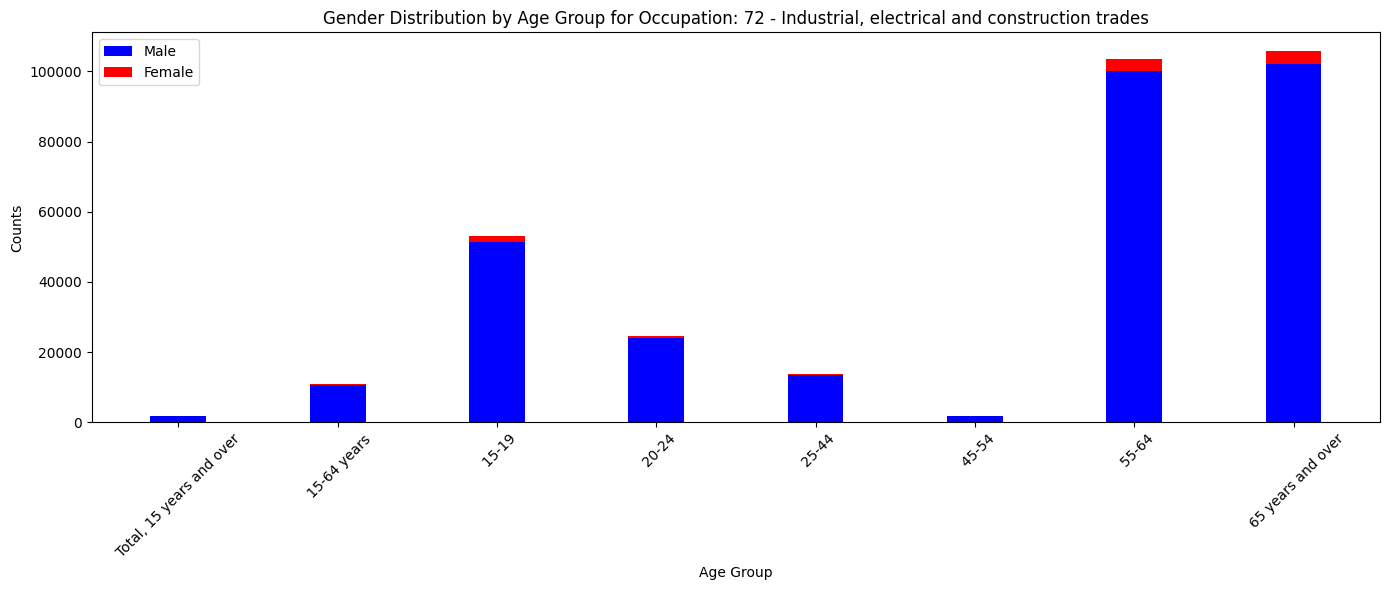

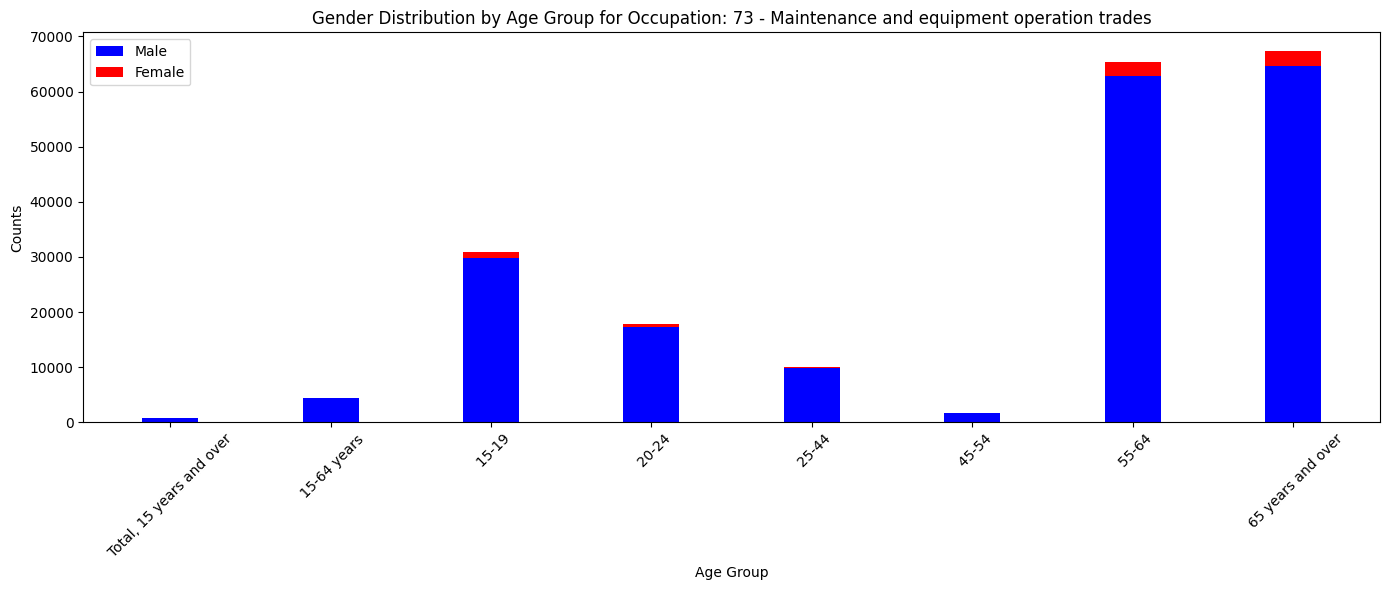

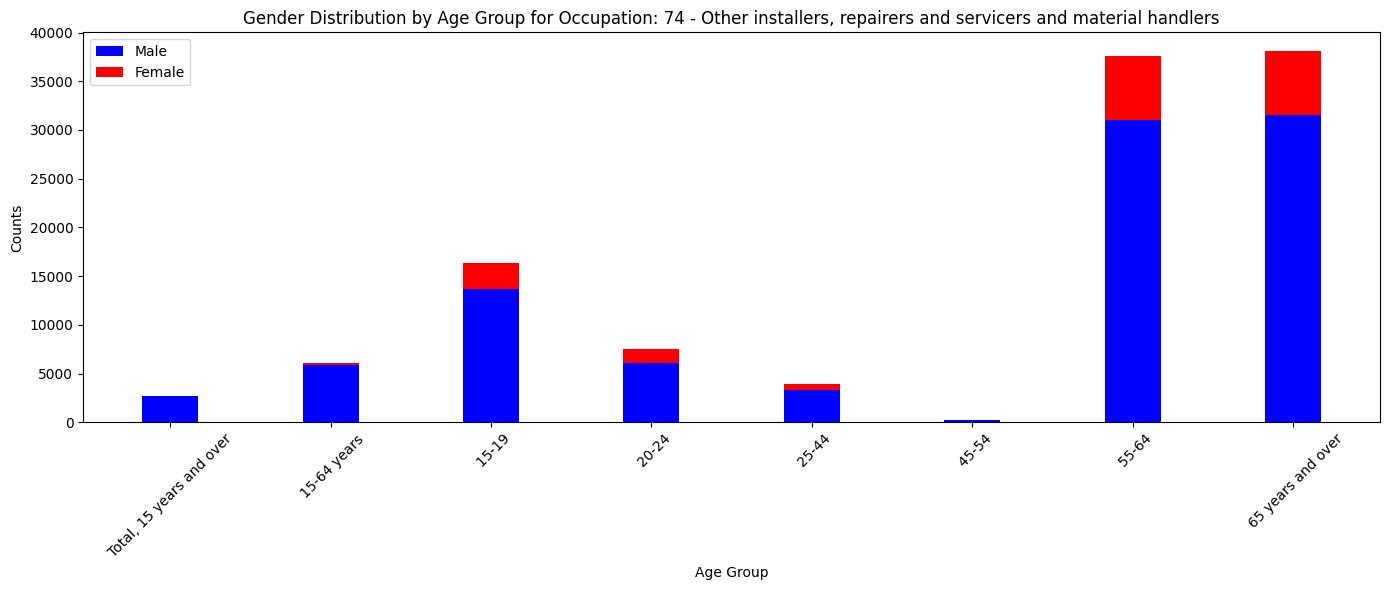

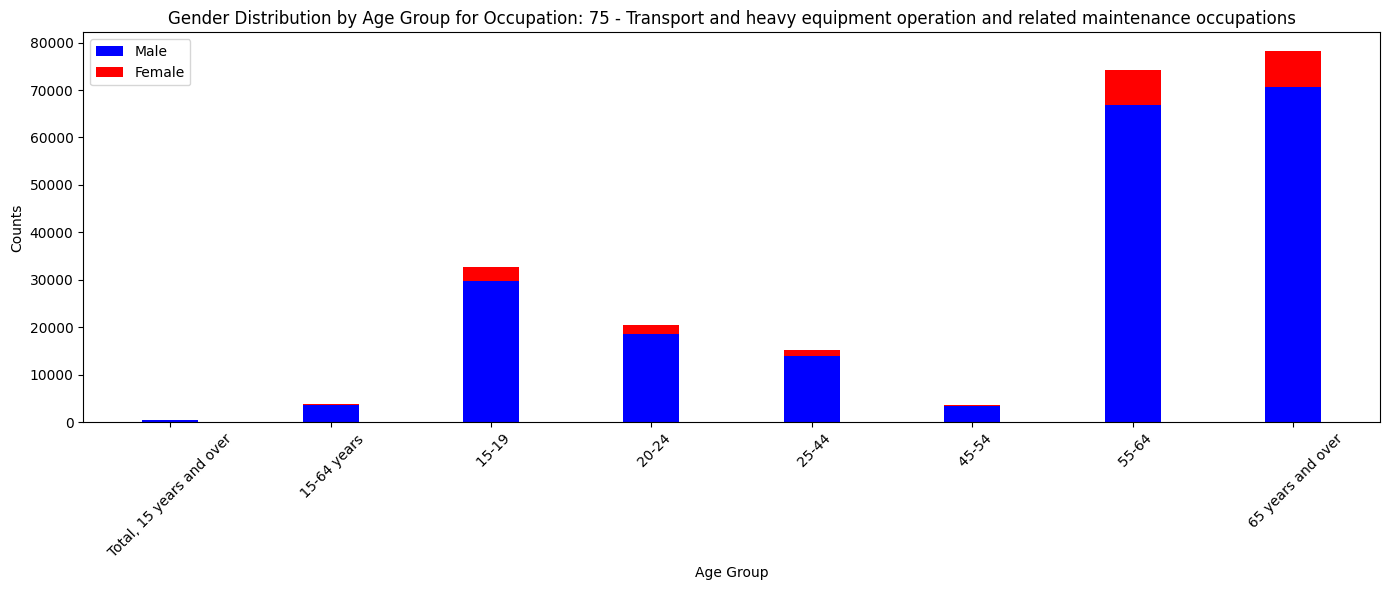

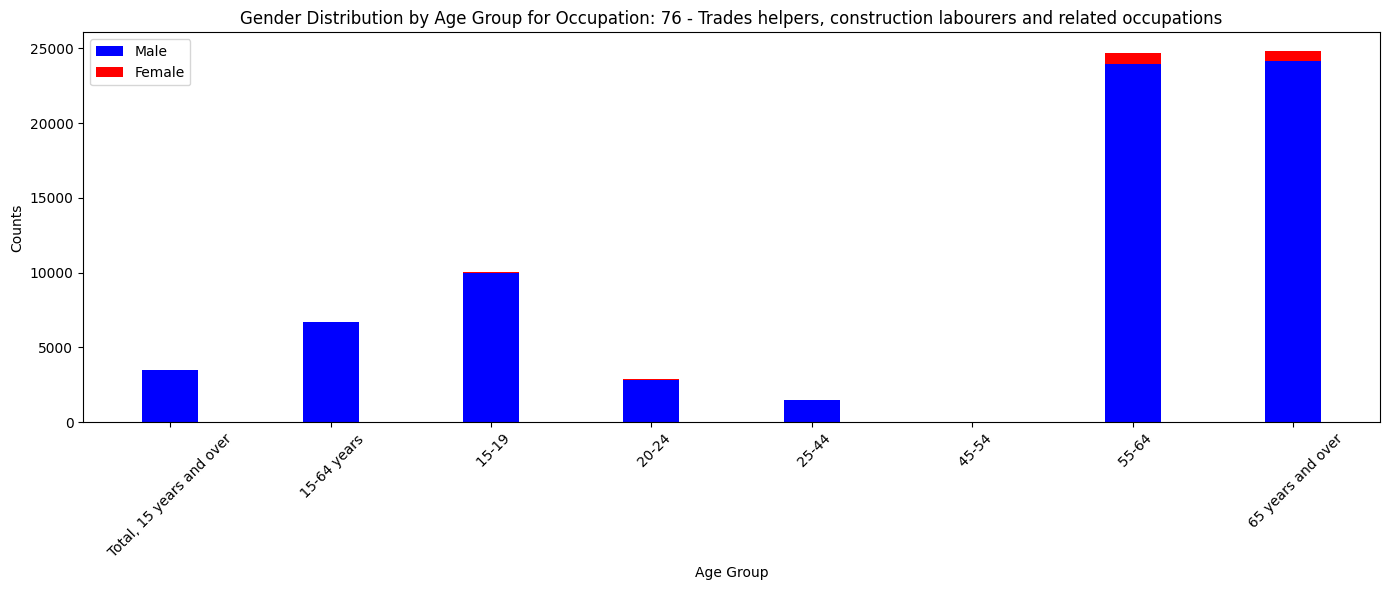

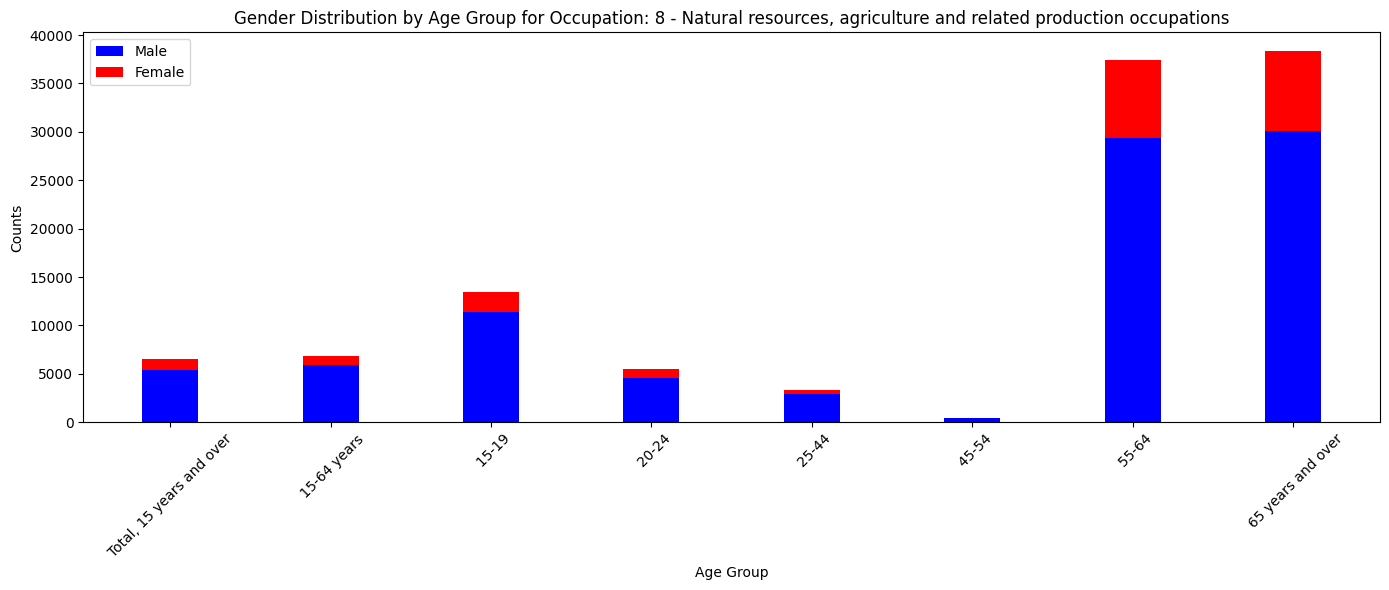

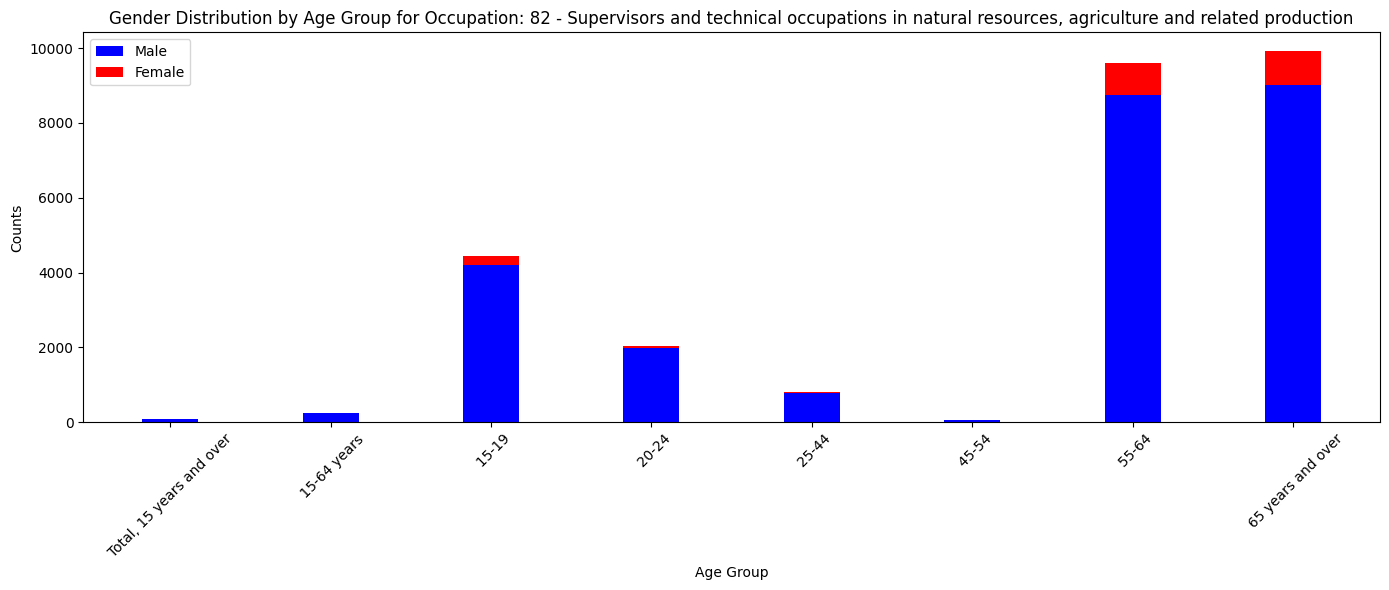

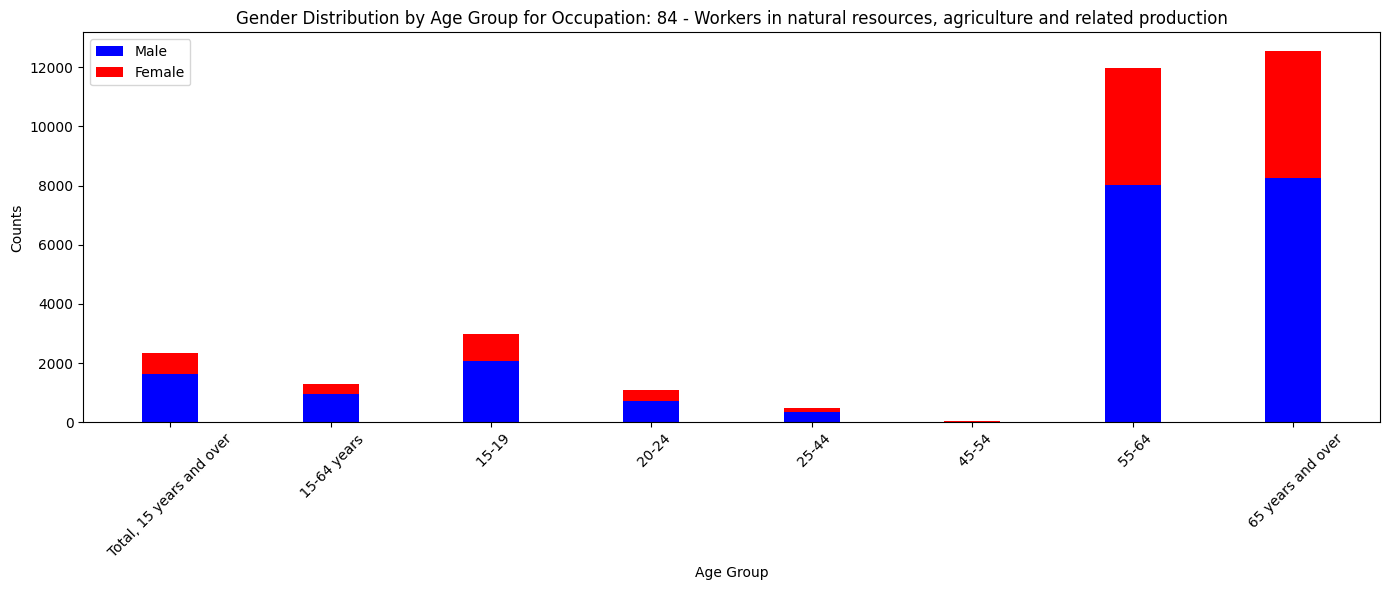

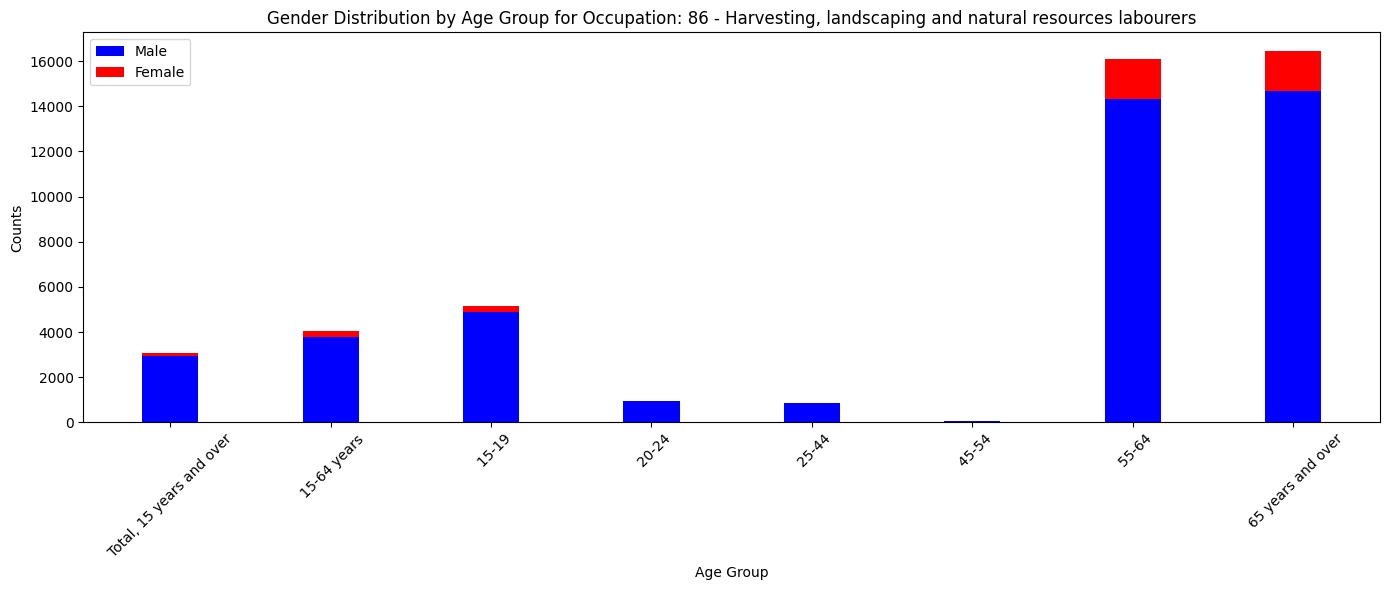

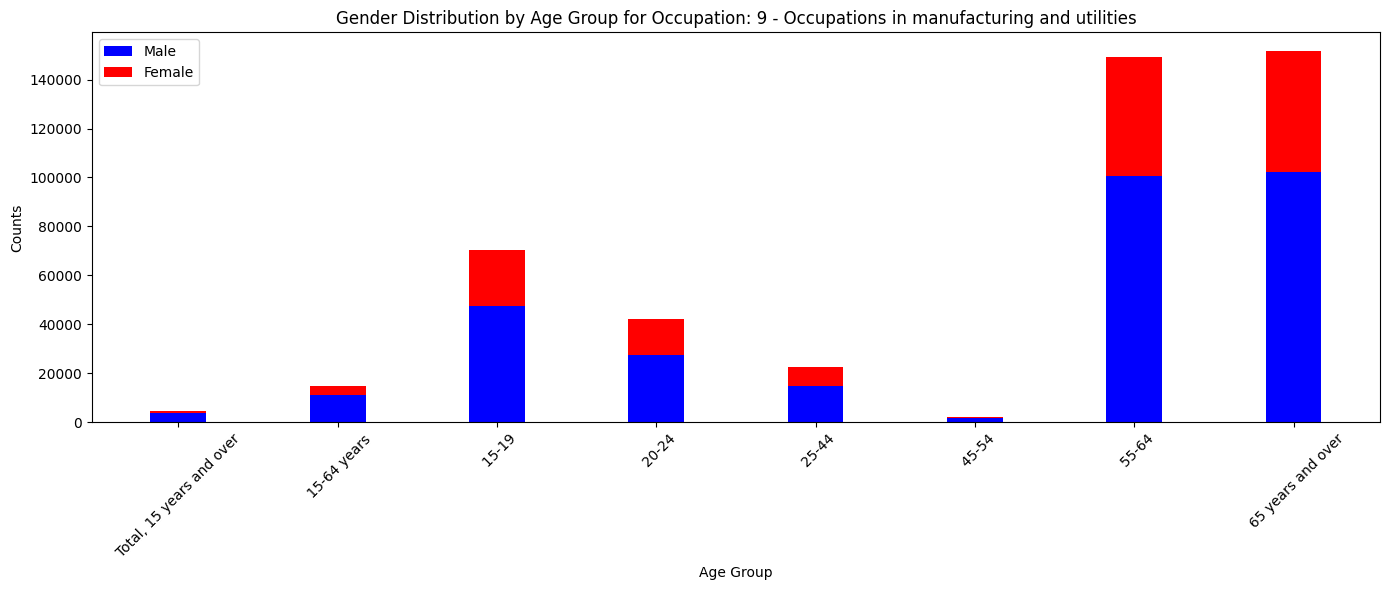

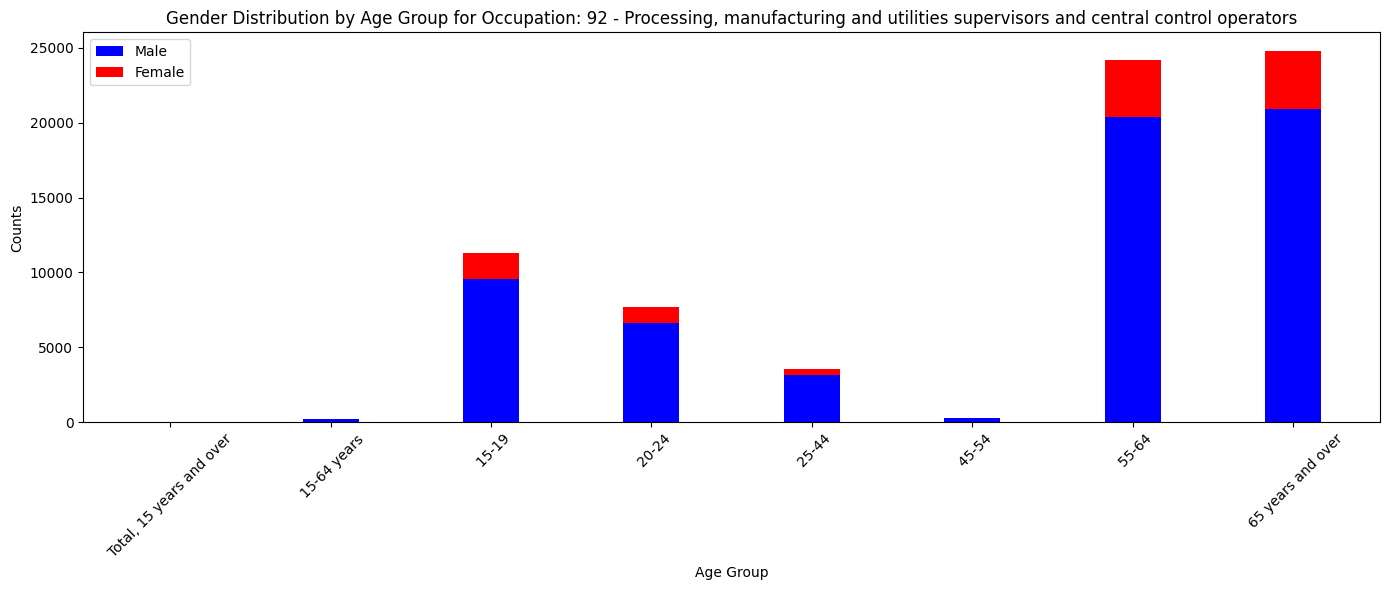

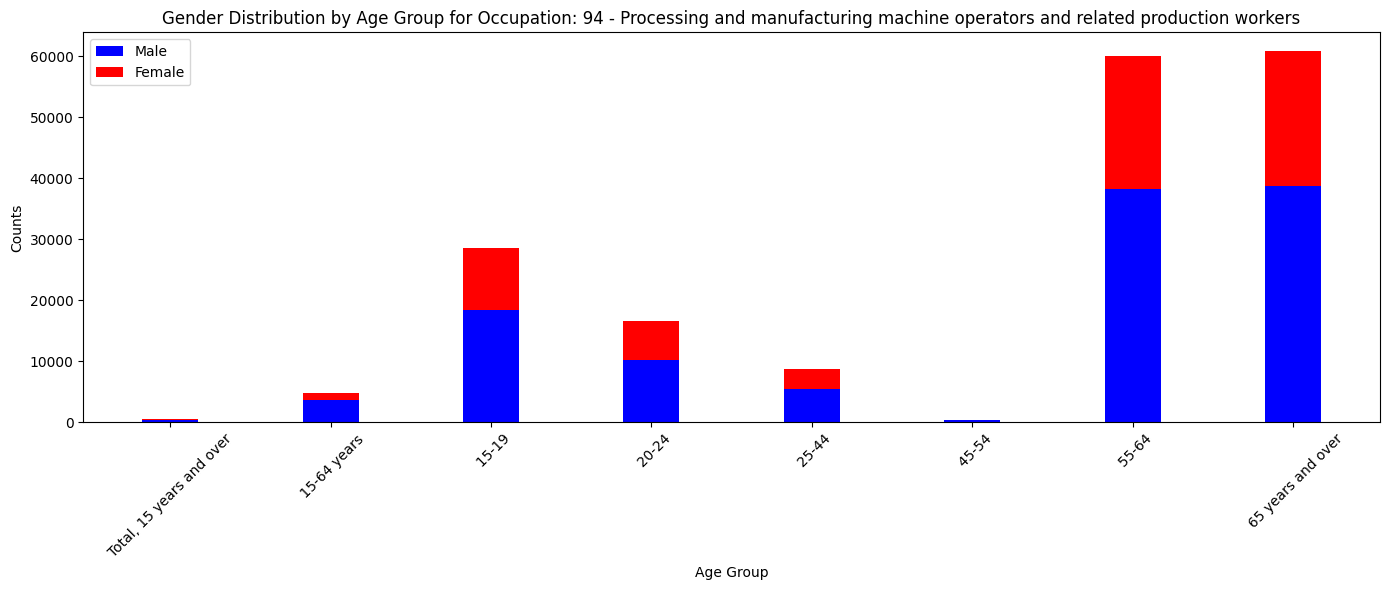

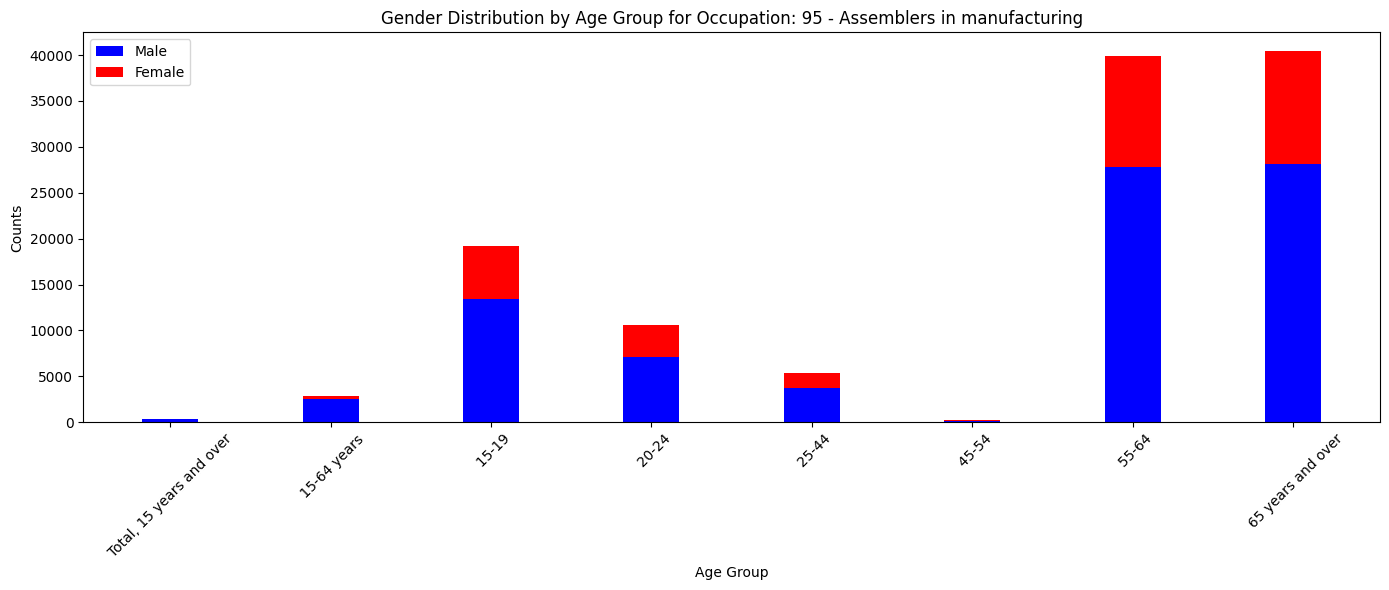

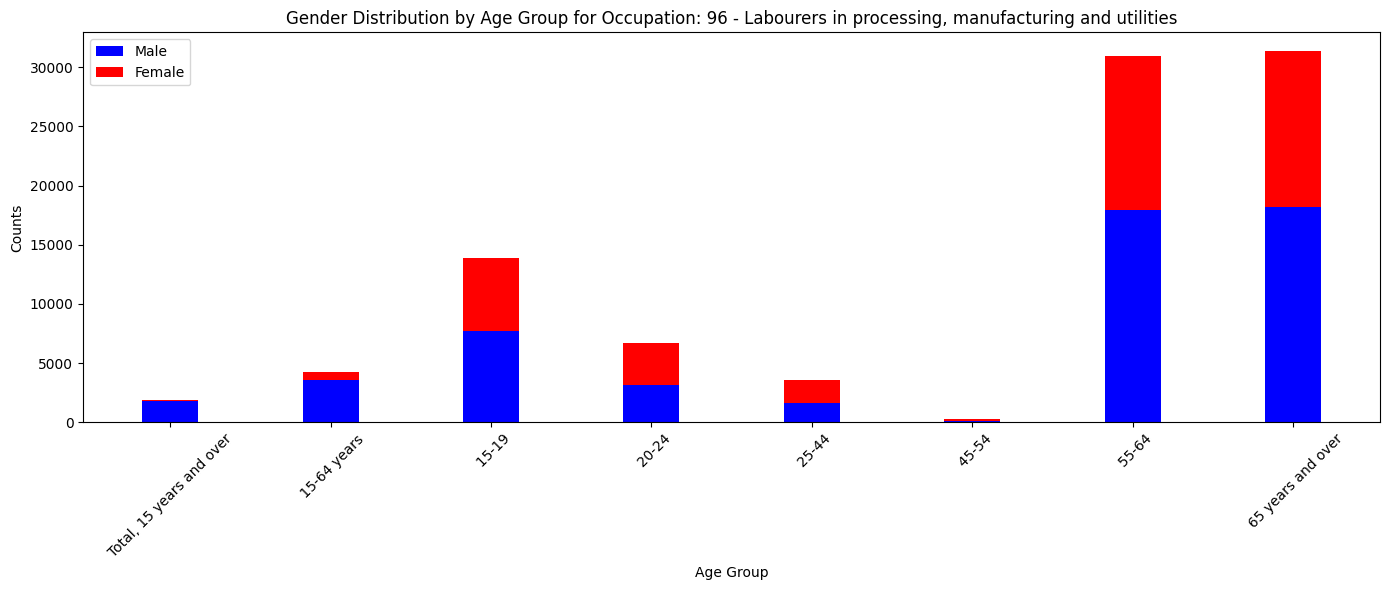

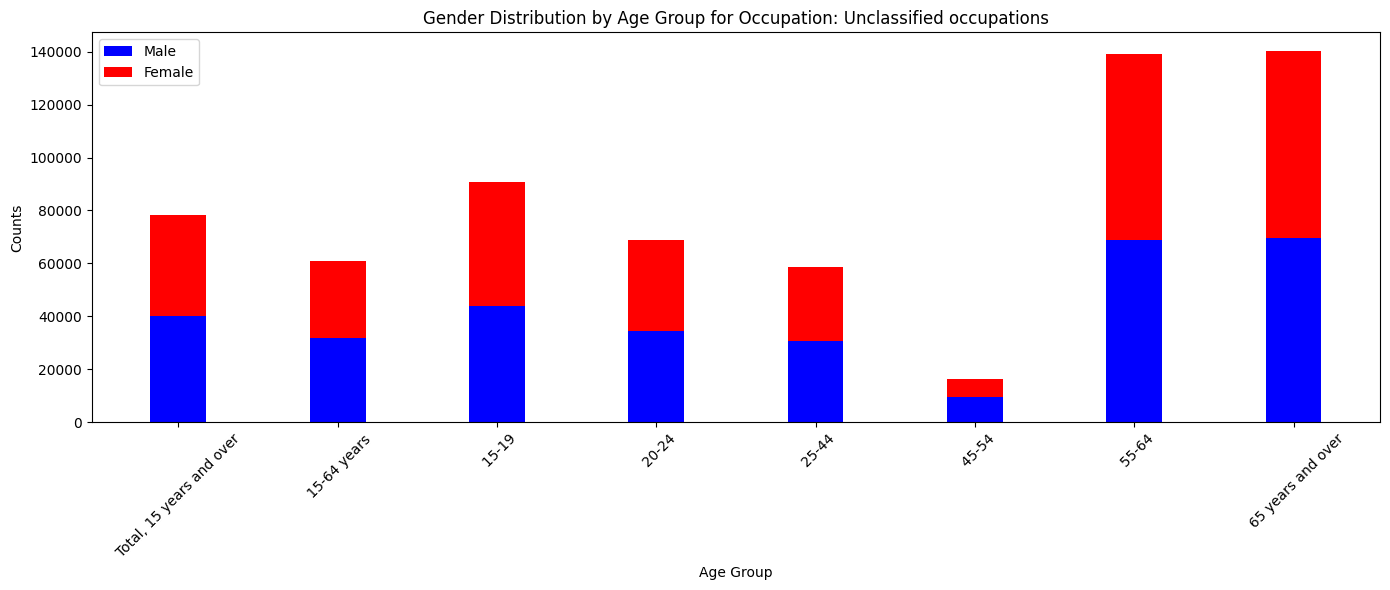

In [13]:
#Visualizing Gender Distribution By Age Agroup for all Occupations

unique_occupations = df['Occupation'].unique()

for occupation in unique_occupations:
    occupation_data = df[df['Occupation'] == occupation]
    age_groups = occupation_data['AGE GROUP'].unique()
    
    # Calculate the sum for males and females for each age group
    males = occupation_data.groupby('AGE GROUP')['Male'].sum()
    females = occupation_data.groupby('AGE GROUP')['Female'].sum()
    
    # Plotting
    bar_width = 0.35
    index = range(len(age_groups))
    plt.figure(figsize=(14, 6))
    
    bar1 = plt.bar(index, males, bar_width, label='Male', color='b')
    bar2 = plt.bar(index, females, bar_width, label='Female', color='r', bottom=males)
    
    plt.xlabel('Age Group')
    plt.ylabel('Counts')
    plt.title(f'Gender Distribution by Age Group for Occupation: {occupation}')
    plt.xticks(index, age_groups, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
